# Introduction

This notebook aims to integrate T-Cell data obtained from https://singlecell.broadinstitute.org/single_cell/study/SCP1289/impaired-local-intrinsic-immunity-to-sars-cov-2-infection-in-severe-covid-19#study-download. Data pertaining to T-Cells is extracted from SCP1289 based on their labels. The T-Cells are analyzed using Seurat to determine if differential expression of ADAR occurs.

## Extract T-Cell Data

T-Cell Data from SCP1289 is extracted and saved for ease of loading in data in future iterations.

In [1]:
#scp1289_data <- read.delim("SCP1289//20210701_NasalSwab_MetaData.txt")
#scp1289_data

#t_cell_data <- scp1289_data[scp1289_data$Coarse_Cell_Annotations=="T Cells",]
#rownames(t_cell_data) <- t_cell_data$NAME
#t_cell_data

In [2]:
#scp1289_normcounts <- read.delim("SCP1289/expression//20210220_NasalSwab_NormCounts.txt")
#scp1289_normcounts

#transpose_scp1289_normcounts <- t(scp1289_normcounts)
#transpose_scp1289_normcounts

In [3]:
#keep_df <- transpose_scp1289_normcounts[rownames(t_cell_data),]
#keep_df

#write.table(t(keep_df), file = "T_Cell_Norm_Counts.txt", sep = "\t", row.names = TRUE, col.names = TRUE)

## Load Packages + Data

T-Cell Data, metadata from SCP1289, and packages needed for Seurat are loaded.

In [4]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [5]:
# This cell supports future resizing of the plots in the Jupyter notebook
defaultWidth = getOption("repr.plot.width")
defaultHeight = getOption("repr.plot.height")
# This cell resizes the output for attractive side-by-side plots
#options(repr.plot.width=defaultWidth, repr.plot.height=defaultHeight*.7) 
# This cell sets the output graphic size back to the Jupyter notebook defaults
# options(repr.plot.width=defaultWidth, repr.plot.height=defaultHeight) 
options(repr.plot.width=10, repr.plot.height=10) 

In [6]:
# T-Cell Data from SCP1289 is loaded in and a Seurat Object based off of this data is created

all_data <- read.delim("T_Cell_Norm_Counts.txt")

tcell_data <- CreateSeuratObject(counts = all_data)
tcell_data

An object of class Seurat 
32871 features across 1475 samples within 1 assay 
Active assay: RNA (32871 features, 0 variable features)

In [7]:
# Metadata from SCP1289 is loaded in and data pertaining to T-Cells are kept
meta <- read.delim("SCP1289//20210701_NasalSwab_MetaData.txt")
meta <- meta[meta$Coarse_Cell_Annotations=="T Cells",]
rownames(meta) <- meta$NAME
meta

NAME                              
TTTCTCACTAAC_Control_Participant7  TTTCTCACTAAC_Control_Participant7 
CACAGTATTTGT_Control_Participant7  CACAGTATTTGT_Control_Participant7 
GCATATAACAAG_Control_Participant7  GCATATAACAAG_Control_Participant7 
ATGCAAGAAATA_Control_Participant7  ATGCAAGAAATA_Control_Participant7 
CATATAAAGCCC_Control_Participant7  CATATAAAGCCC_Control_Participant7 
ATCCACATAAAG_Control_Participant7  ATCCACATAAAG_Control_Participant7 
GGATCATAGTCT_Control_Participant7  GGATCATAGTCT_Control_Participant7 
CTGATTTAGTTA_Control_Participant7  CTGATTTAGTTA_Control_Participant7 
ACAGTGAGTTCT_Control_Participant7  ACAGTGAGTTCT_Control_Participant7 
CCACAGTGACCC_Control_Participant7  CCACAGTGACCC_Control_Participant7 
AACAGTTCAAAG_Control_Participant7  AACAGTTCAAAG_Control_Participant7 
AACAATACTTAG_Control_Participant7  AACAATACTTAG_Control_Participant7 
AGTTTTTAATTC_Control_Participant7  AGTTTTTAATTC_Control_Participant7 
CATACCGTCCTA_Control_Participant7  CATACCGTCCTA_Control_Participant7 
AACTATTAGTGC_Control_Participant7  AACTATTAGTGC_Control_Participant7 
AACCAAGAAGTG_COVID19_Participant13 AACCAAGAAGTG_COVID19_Participant13
AACCTATACTGA_COVID19_Participant13 AACCTATACTGA_COVID19_Participant13
GGACAGGGTGTG_COVID19_Participant13 GGACAGGGTGTG_COVID19_Participant13
CTTAGCGGGCTG_COVID19_Participant13 CTTAGCGGGCTG_COVID19_Participant13
GTGATATATGAA_COVID19_Participant13 GTGATATATGAA_COVID19_Participant13
ATCAGCTTATCT_COVID19_Participant13 ATCAGCTTATCT_COVID19_Participant13
CATTACTCCTTA_COVID19_Participant13 CATTACTCCTTA_COVID19_Participant13
CACCTCGGAGCA_COVID19_Participant13 CACCTCGGAGCA_COVID19_Participant13
TAAGTAAATGGT_COVID19_Participant13 TAAGTAAATGGT_COVID19_Participant13
AGGTCGTCAATG_COVID19_Participant13 AGGTCGTCAATG_COVID19_Participant13
CGTACTTATTTC_COVID19_Participant13 CGTACTTATTTC_COVID19_Participant13
GCCTACATCCGA_COVID19_Participant13 GCCTACATCCGA_COVID19_Participant13
CACACTATGAAG_COVID19_Participant13 CACACTATGAAG_COVID19_Participant13
CAGATATTTCGT_COVID19_Participant13 CAGATATTTCGT_COVID19_Participant13
GTATAATTGGCA_COVID19_Participant13 GTATAATTGGCA_COVID19_Participant13
⋮                                  ⋮                                 
GAGAAGAAGGCA_COVID19_Participant39 GAGAAGAAGGCA_COVID19_Participant39
TCGCGTGGCTGT_COVID19_Participant39 TCGCGTGGCTGT_COVID19_Participant39
GGCGTCCCAGCC_COVID19_Participant39 GGCGTCCCAGCC_COVID19_Participant39
ACAACACACATA_COVID19_Participant39 ACAACACACATA_COVID19_Participant39
TATACAACGTAC_COVID19_Participant39 TATACAACGTAC_COVID19_Participant39
ATGAAGTAAGCT_COVID19_Participant39 ATGAAGTAAGCT_COVID19_Participant39
CCGTCAGACTTC_COVID19_Participant39 CCGTCAGACTTC_COVID19_Participant39
CGCTCAGTCGGC_COVID19_Participant39 CGCTCAGTCGGC_COVID19_Participant39
TTATCTCAGGAA_COVID19_Participant39 TTATCTCAGGAA_COVID19_Participant39
CTACTATGATCC_COVID19_Participant39 CTACTATGATCC_COVID19_Participant39
CAGGAGACGCAA_COVID19_Participant39 CAGGAGACGCAA_COVID19_Participant39
AGTCCATATTAA_COVID19_Participant39 AGTCCATATTAA_COVID19_Participant39
AAAGCCGCCACA_COVID19_Participant17 AAAGCCGCCACA_COVID19_Participant17
ATCTGGATATTG_Control_Participant8  ATCTGGATATTG_Control_Participant8 
CTTAAGCTCATT_Control_Participant8  CTTAAGCTCATT_Control_Participant8 
GACGGAGCGTAT_COVID19_Participant34 GACGGAGCGTAT_COVID19_Participant34
GAGTTGGACGGT_COVID19_Participant34 GAGTTGGACGGT_COVID19_Participant34
CCGTAGCTGATA_COVID19_Participant34 CCGTAGCTGATA_COVID19_Participant34
CAAATTAAGACC_COVID19_Participant34 CAAATTAAGACC_COVID19_Participant34
GTTCATCGGGTA_COVID19_Participant34 GTTCATCGGGTA_COVID19_Participant34
TGCATACGAGAT_COVID19_Participant34 TGCATACGAGAT_COVID19_Participant34
GCTTCAATCGAA_COVID19_Participant34 GCTTCAATCGAA_COVID19_Participant34
CTCATTCGTTGA_COVID19_Participant34 CTCATTCGTTGA_COVID19_Participant34
CTTCCTGTACCT_COVID19_Participant40 CTTCCTGTACCT_COVID19_Participant40
AAGTTTCACCAT_COVID19_Participant15 AAGTTTCACCAT_COVID19_Participant15
ACCCTTGCGCCA_COVID19_Participant29 ACCCTTGCGC

## Set Up Seurat Objects

Integration analysis based on Seurat tutorial is performed (https://satijalab.org/seurat/articles/integration_introduction.html). 

In [8]:
groups <- meta$SARSCoV2_PCR_Status
names(groups) <- colnames(tcell_data)
tcell_data <- AddMetaData(object = tcell_data, metadata = meta)
obj.list <- SplitObject(tcell_data, split.by = "SARSCoV2_PCR_Status")

# normalize and identify variable features for each dataset independently
obj.list <- lapply(X = obj.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = obj.list, nfeatures = 5000)

In [9]:
# ADAR is NOT found as a variable feature
grepl(features, "ADAR", fixed = TRUE)
grepl(features, "GNLY", fixed = TRUE)
head(features)

Warning message in grepl(features, "ADAR", fixed = TRUE):
“argument 'pattern' has length > 1 and only the first element will be used”


[1] FALSE

Warning message in grepl(features, "GNLY", fixed = TRUE):
“argument 'pattern' has length > 1 and only the first element will be used”


[1] TRUE

[1] "GNLY"     "MTRNR2L1" "HSPA6"    "HSPA1A"   "PKD1L1"   "TTN"

In [10]:
immune.anchors <- FindIntegrationAnchors(object.list = obj.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2451 anchors

Filtering anchors

	Retained 1207 anchors



In [11]:
# this command creates an 'integrated' data assay
immune.combined <- IntegrateData(anchorset = immune.anchors)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [12]:
# specify that we will perform downstream analysis on the corrected data note that the
# original unmodified data still resides in the 'RNA' assay
DefaultAssay(immune.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 36, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:36)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:36)
immune.combined <- FindClusters(immune.combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:31:49 UMAP embedding parameters a = 0.9922 b = 1.112

19:31:49 Read 1475 rows and found 36 numeric columns

19:31:49 Using Annoy for neighbor search, n_neighbors = 30

19:31:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:31:49 Writing NN index file to temp file /var/folders/ll/kbgcy30x0flfnj6vj0m5xypm0000gn/T//RtmpMfLezY/file1864f70d4b2ca

19:31:49 Searching Annoy index using 1 thread, search_k = 3000

19:31:49 Annoy recall = 100%

19:31:49 Commencing smooth kNN distance calibra

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1475
Number of edges: 86363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7358
Number of communities: 5
Elapsed time: 0 seconds


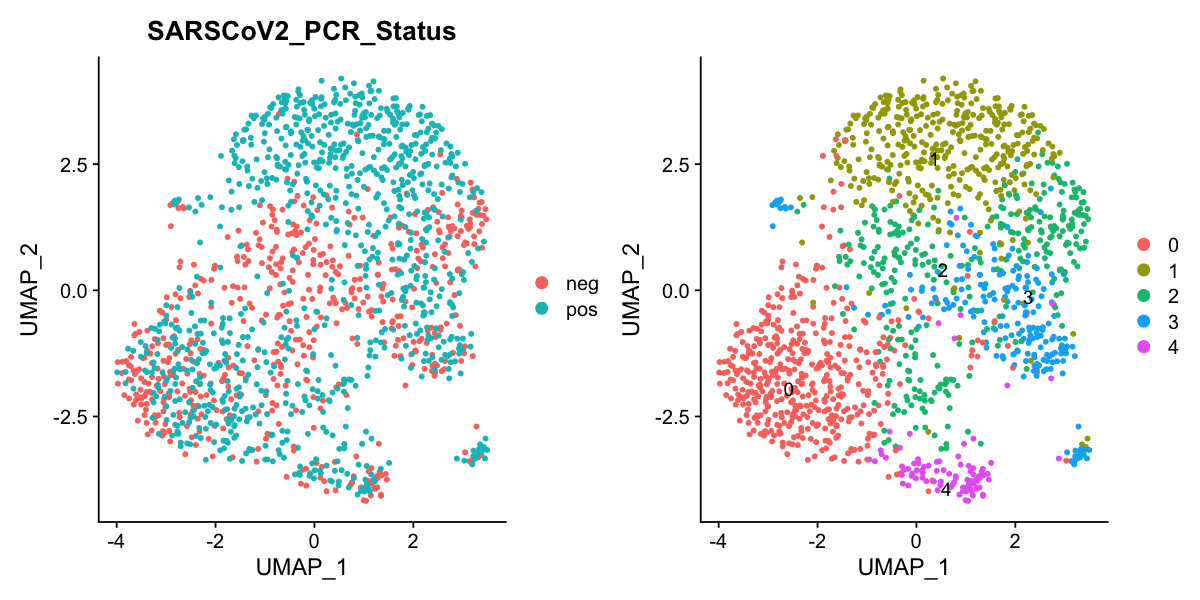

In [13]:
# Visualization of clusters determined by Seurat integration
options(repr.plot.width=10, repr.plot.height=5) 
p1 <- DimPlot(immune.combined, reduction = "umap", group.by = "SARSCoV2_PCR_Status")
p2 <- DimPlot(immune.combined, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

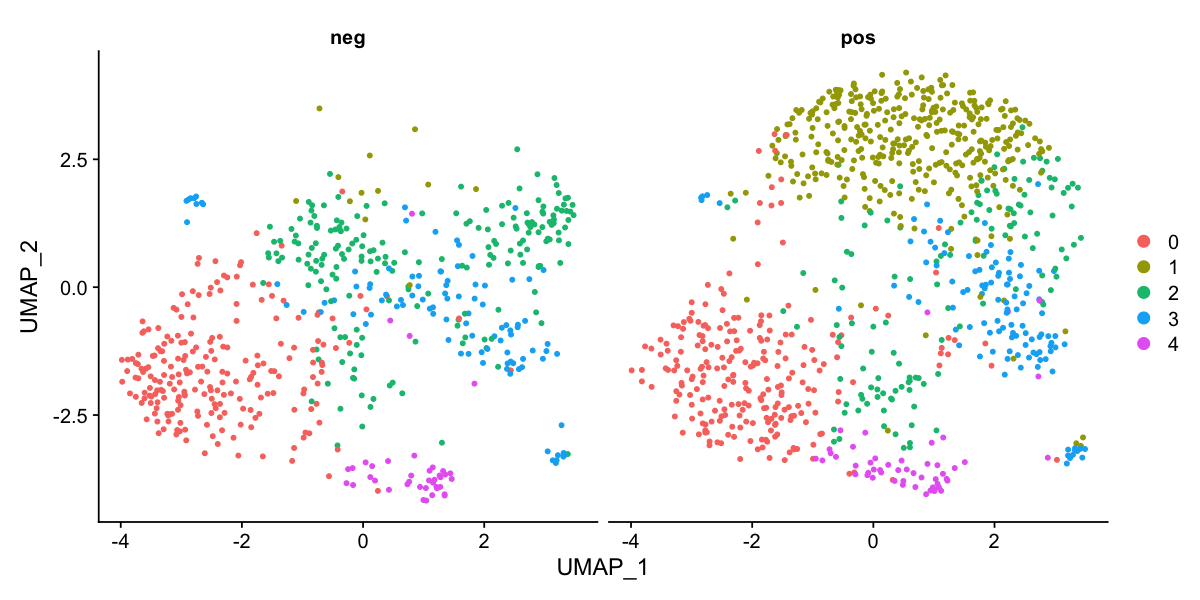

In [14]:
DimPlot(immune.combined, reduction = "umap", split.by = "SARSCoV2_PCR_Status")

# Find Conserved Markers
- For cell type identification

In [15]:
# For performing differential expression after integration, we switch back to the original
# data

# DE analysis between covid and normal in each cluster. If there are 4 clusters, has 4 DE genes lists.

DefaultAssay(immune.combined) <- "RNA"
g0.markers <- FindConservedMarkers(immune.combined, ident.1 = 0, grouping.var = "SARSCoV2_PCR_Status", verbose = FALSE)
head(g0.markers)

neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
MALAT1   6.880806e-25 -0.6406655     0.995     0.989     2.261790e-20 
FAM53C   1.130559e-16  0.9041882     0.472     0.135     3.716260e-12 
DEDD2    1.456907e-13  0.8333014     0.537     0.221     4.788999e-09 
NR4A1    2.311650e-16  0.7243557     0.702     0.275     7.598625e-12 
RASGEF1B 5.307743e-19  0.8766785     0.573     0.169     1.744708e-14 
ATF3     9.387515e-23  1.1717828     0.578     0.152     3.085770e-18 
         pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
MALAT1   2.059865e-48 -0.9075784     1.000     0.985     6.770981e-44 
FAM53C   8.105048e-42  1.1379146     0.629     0.147     2.664210e-37 
DEDD2    1.995928e-41  1.0045132     0.679     0.174     6.560816e-37 
NR4A1    1.715772e-35  0.7386097     0.792     0.243     5.639915e-31 
RASGEF1B 2.543253e-35  0.8589360     0.721     0.216     8.359926e-31 
ATF3     4.301406e-35  0.9996980     0.779     0.254     1.413915e-30 
         max_pval     minimump_p_val
MALAT1   6.880806e-25 4.119729e-48  
FAM53C   1.130559e-16 1.621010e-41  
DEDD2    1.456907e-13 3.991857e-41  
NR4A1    2.311650e-16 3.431545e-35  
RASGEF1B 5.307743e-19 5.086505e-35  
ATF3     9.387515e-23 8.602812e-35

In [16]:
g1.markers <- FindConservedMarkers(immune.combined, ident.1 = 1, grouping.var = "SARSCoV2_PCR_Status", verbose = FALSE)
head(g1.markers)

neg_p_val   neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
MALAT1  0.003137914  0.5545956     1.000     0.991     1            
SUN2    0.007503860 -2.0513787     0.083     0.461     1            
LCK     0.029139724 -1.5885856     0.083     0.405     1            
SERTAD1 0.193557391 -1.0342628     0.083     0.232     1            
ISG15   0.556587053 -0.3169247     0.083     0.151     1            
ODC1    0.132564883  1.1353414     0.417     0.306     1            
        pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
MALAT1  1.141023e-41  0.6702260     0.987     0.991     3.750656e-37 
SUN2    2.667777e-22 -0.8009659     0.105     0.447     8.769250e-18 
LCK     3.861234e-21 -0.7048178     0.108     0.441     1.269226e-16 
SERTAD1 5.122805e-21 -0.5652097     0.097     0.421     1.683917e-16 
ISG15   5.356059e-21 -0.8198379     0.070     0.367     1.760590e-16 
ODC1    1.948093e-20 -0.6317658     0.111     0.439     6.403577e-16 
        max_pval    minimump_p_val
MALAT1  0.003137914 2.282045e-41  
SUN2    0.007503860 5.335554e-22  
LCK     0.029139724 7.722467e-21  
SERTAD1 0.193557391 1.024561e-20  
ISG15   0.556587053 1.071212e-20  
ODC1    0.132564883 3.896186e-20

In [17]:
g2.markers <- FindConservedMarkers(immune.combined, ident.1 = 2, grouping.var = "SARSCoV2_PCR_Status", verbose = FALSE)
head(g2.markers)

neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
TNFAIP3   6.184043e-04 -0.3421765     0.525     0.734     1.000000e+00 
ATF3      6.775724e-14 -1.1575755     0.101     0.431     2.227248e-09 
NR4A2     4.459690e-13 -0.8884577     0.298     0.659     1.465945e-08 
MTRNR2L12 3.074232e-12  0.9044961     0.753     0.588     1.010531e-07 
RGCC      3.407019e-12 -0.9308042     0.167     0.477     1.119921e-07 
NR4A3     1.247518e-11 -1.0942588     0.126     0.415     4.100717e-07 
          pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
TNFAIP3   6.818327e-15 -1.0792799     0.396     0.735     2.241252e-10 
ATF3      3.712512e-04 -0.6246465     0.246     0.419     1.000000e+00 
NR4A2     5.613037e-06 -0.6897469     0.336     0.566     1.845061e-01 
MTRNR2L12 8.669621e-06  0.7093262     0.545     0.368     2.849791e-01 
RGCC      1.696741e-06 -0.8167241     0.164     0.377     5.577359e-02 
NR4A3     3.681397e-06 -0.8488353     0.082     0.274     1.210112e-01 
          max_pval     minimump_p_val
TNFAIP3   6.184043e-04 1.363665e-14  
ATF3      3.712512e-04 1.355145e-13  
NR4A2     5.613037e-06 8.919380e-13  
MTRNR2L12 8.669621e-06 6.148465e-12  
RGCC      1.696741e-06 6.814039e-12  
NR4A3     3.681397e-06 2.495036e-11

In [18]:
g3.markers <- FindConservedMarkers(immune.combined, ident.1 = 3, grouping.var = "SARSCoV2_PCR_Status", verbose = FALSE)
head(g3.markers)

neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
DNAH11 6.043998e-07 1.2409706      0.15      0.030     0.0198672249 
FHAD1  1.330579e-07 1.1209690      0.18      0.039     0.0043737467 
LRRIQ1 4.520417e-09 1.8133589      0.18      0.032     0.0001485906 
ERICH3 3.994900e-08 1.4729711      0.16      0.028     0.0013131635 
MT-CO2 2.345590e-04 0.3146967      0.92      0.942     1.0000000000 
MT-ND4 5.005747e-08 0.4370016      1.00      0.985     0.0016454391 
       pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
DNAH11 6.628103e-18 1.8277376      0.188     0.019     2.178724e-13 
FHAD1  1.200885e-16 1.7788359      0.188     0.021     3.947430e-12 
LRRIQ1 1.495317e-16 1.7743963      0.179     0.019     4.915255e-12 
ERICH3 9.329932e-15 1.6812754      0.170     0.020     3.066842e-10 
MT-CO2 6.258637e-14 0.7191219      0.938     0.807     2.057276e-09 
MT-ND4 1.126476e-13 0.6076258      0.991     0.926     3.702839e-09 
       max_pval     minimump_p_val
DNAH11 6.043998e-07 1.325621e-17  
FHAD1  1.330579e-07 2.401770e-16  
LRRIQ1 4.520417e-09 2.990633e-16  
ERICH3 3.994900e-08 1.865986e-14  
MT-CO2 2.345590e-04 1.251727e-13  
MT-ND4 5.005747e-08 2.252952e-13

In [19]:
g4.markers <- FindConservedMarkers(immune.combined, ident.1 = 4, grouping.var = "SARSCoV2_PCR_Status", verbose = FALSE)
head(g4.markers)

neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
TYROBP 6.518297e-31 2.032352       0.487     0.028     2.142629e-26 
FGFBP2 2.651018e-52 2.356034       0.538     0.009     8.714163e-48 
CX3CR1 4.086722e-50 2.282466       0.436     0.002     1.343346e-45 
PLEK   5.198358e-47 2.475480       0.615     0.025     1.708752e-42 
TRDC   9.885200e-14 1.254298       0.256     0.021     3.249364e-09 
ITGAM  5.139762e-39 1.858348       0.410     0.008     1.689491e-34 
       pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
TYROBP 1.174454e-58 1.9724315      0.569     0.026     3.860548e-54 
FGFBP2 2.653492e-31 1.2927484      0.157     0.000     8.722294e-27 
CX3CR1 1.405788e-15 1.0751775      0.118     0.004     4.620965e-11 
PLEK   3.711743e-46 1.6175077      0.471     0.023     1.220087e-41 
TRDC   4.218706e-43 1.7293549      0.490     0.029     1.386731e-38 
ITGAM  1.878523e-15 0.9067131      0.137     0.006     6.174892e-11 
       max_pval     minimump_p_val
TYROBP 6.518297e-31 2.348908e-58  
FGFBP2 2.653492e-31 5.302037e-52  
CX3CR1 1.405788e-15 8.173444e-50  
PLEK   3.711743e-46 1.039672e-46  
TRDC   9.885200e-14 8.437412e-43  
ITGAM  1.878523e-15 1.027952e-38

In [20]:
# Expression of early response genes (FOSB, NR4A2, and CCL5), “interferon responsive cytotoxic CD8 T cells 
# (GZMB, GZMA, GNLY, PRF1, GZMH, ISG20, IFIT3, APOBEC3C, GBP5) 
# and genes associated with effector CD8 T cell function (LAG3, IL2RB, IKZF3, TBX21). 
subset <- c("FOSB", "NR4A2", "CCL5", 
            "GZMB", "GZMA", "GNLY", "PRF1", "GZMH", "ISG20", "IFIT3", "APOBEC3C", "GBP5", "LAG3", "IL2RB", "IKZF3", "TBX21", 
            "CD69", "CD8A", "ITGAE", "ITGB7", "CD44")
g0.markers[subset,]
g1.markers[subset,]
g2.markers[subset,]
g3.markers[subset,]
g4.markers[subset,]


neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
FOSB  3.490404e-15 0.6203639      0.963     0.544     1.147331e-10 
NR4A2 7.373561e-27 1.0816596      0.844     0.338     2.423763e-22 
NA              NA        NA         NA        NA               NA 
NA.1            NA        NA         NA        NA               NA 
NA.2            NA        NA         NA        NA               NA 
NA.3            NA        NA         NA        NA               NA 
PRF1  2.974060e-03 0.3355410      0.280     0.163     1.000000e+00 
NA.4            NA        NA         NA        NA               NA 
NA.5            NA        NA         NA        NA               NA 
NA.6            NA        NA         NA        NA               NA 
NA.7            NA        NA         NA        NA               NA 
NA.8            NA        NA         NA        NA               NA 
NA.9            NA        NA         NA        NA               NA 
NA.10           NA        NA         NA        NA               NA 
NA.11           NA        NA         NA        NA               NA 
TBX21 4.185672e-04 0.4707415      0.206     0.100     1.000000e+00 
NA.12           NA        NA         NA        NA               NA 
CD8A  1.197086e-14 0.6677557      0.638     0.241     3.934943e-10 
NA.13           NA        NA         NA        NA               NA 
ITGB7 5.200395e-03 0.3814479      0.252     0.149     1.000000e+00 
NA.14           NA        NA         NA        NA               NA 
      pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
FOSB  1.693874e-13 0.3913725      0.979     0.506     5.567933e-09 
NR4A2 1.524094e-23 0.5853637      0.942     0.385     5.009850e-19 
NA              NA        NA         NA        NA               NA 
NA.1            NA        NA         NA        NA               NA 
NA.2            NA        NA         NA        NA               NA 
NA.3            NA        NA         NA        NA               NA 
PRF1  1.655992e-11 0.4082669      0.383     0.147     5.443412e-07 
NA.4            NA        NA         NA        NA               NA 
NA.5            NA        NA         NA        NA               NA 
NA.6            NA        NA         NA        NA               NA 
NA.7            NA        NA         NA        NA               NA 
NA.8            NA        NA         NA        NA               NA 
NA.9            NA        NA         NA        NA               NA 
NA.10           NA        NA         NA        NA               NA 
NA.11           NA        NA         NA        NA               NA 
TBX21 3.122378e-24 0.7943584      0.388     0.090     1.026357e-19 
NA.12           NA        NA         NA        NA               NA 
CD8A  4.834483e-18 0.4527904      0.704     0.275     1.589143e-13 
NA.13           NA        NA         NA        NA               NA 
ITGB7 8.234492e-11 0.4961135      0.296     0.106     2.706760e-06 
NA.14           NA        NA         NA        NA               NA 
      max_pval     minimump_p_val
FOSB  1.693874e-13 6.980808e-15  
NR4A2 1.524094e-23 1.474712e-26  
NA              NA           NA  
NA.1            NA           NA  
NA.2            NA           NA  
NA.3            NA           NA  
PRF1  2.974060e-03 3.311984e-11  
NA.4            NA           NA  
NA.5            NA           NA  
NA.6            NA           NA  
NA.7            NA           NA  
NA.8            NA           NA  
NA.9            NA           NA  
NA.10           NA           NA  
NA.11           NA           NA  
TBX21 4.185672e-04 6.244756e-24  
NA.12           NA           NA  
CD8A  1.197086e-14 9.668965e-18  
NA.13           NA           NA  
ITGB7 5.200395e-03 1.646898e-10  
NA.14           NA           NA

neg_p_val  neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
NA               NA         NA        NA        NA     NA           
NA.1             NA         NA        NA        NA     NA           
NA.2             NA         NA        NA        NA     NA           
GZMB     0.10385960 -1.5284732     0.000     0.184      1           
GZMA     0.10797345 -1.3775265     0.000     0.180      1           
GNLY     0.09605819 -1.9481731     0.000     0.191      1           
PRF1     0.07573460 -1.5377675     0.000     0.213      1           
GZMH     0.18399389 -1.0722619     0.000     0.130      1           
ISG20    0.11223612 -1.4343763     0.000     0.177      1           
NA.3             NA         NA        NA        NA     NA           
APOBEC3C 0.91131849  0.4813203     0.167     0.166      1           
NA.4             NA         NA        NA        NA     NA           
LAG3     0.17390492 -1.2714236     0.000     0.135      1           
IL2RB    0.14912157 -1.0520358     0.083     0.274      1           
IKZF3    0.02017268 -0.4195019     0.083     0.486      1           
TBX21    0.76070761  0.6265690     0.167     0.141      1           
NA.5             NA         NA        NA        NA     NA           
NA.6             NA         NA        NA        NA     NA           
NA.7             NA         NA        NA        NA     NA           
ITGB7    0.09419312 -1.3146589     0.000     0.193      1           
CD44     0.62774750  0.6545324     0.417     0.474      1           
         pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
NA                 NA         NA        NA        NA               NA 
NA.1               NA         NA        NA        NA               NA 
NA.2               NA         NA        NA        NA               NA 
GZMB     2.505290e-13 -0.6510884     0.100     0.335     8.235139e-09 
GZMA     3.309036e-16 -0.7112975     0.075     0.326     1.087713e-11 
GNLY     1.051906e-10 -0.8233872     0.049     0.207     3.457720e-06 
PRF1     1.039270e-13 -0.6925843     0.078     0.300     3.416184e-09 
GZMH     4.831602e-11 -0.5871301     0.027     0.171     1.588196e-06 
ISG20    3.201117e-13 -0.4070907     0.062     0.268     1.052239e-08 
NA.3               NA         NA        NA        NA               NA 
APOBEC3C 5.181486e-11 -0.4776907     0.057     0.229     1.703206e-06 
NA.4               NA         NA        NA        NA               NA 
LAG3     4.194760e-13 -0.8492863     0.032     0.205     1.378860e-08 
IL2RB    1.190802e-15 -0.5023204     0.094     0.356     3.914287e-11 
IKZF3    1.388263e-13 -0.3675606     0.199     0.523     4.563359e-09 
TBX21    1.280990e-13 -0.5089298     0.051     0.250     4.210743e-09 
NA.5               NA         NA        NA        NA               NA 
NA.6               NA         NA        NA        NA               NA 
NA.7               NA         NA        NA        NA               NA 
ITGB7    1.729478e-14 -0.7210918     0.040     0.236     5.684967e-10 
CD44     8.254195e-02  0.4067543     0.321     0.497     1.000000e+00 
         max_pval   minimump_p_val
NA               NA           NA  
NA.1             NA           NA  
NA.2             NA           NA  
GZMB     0.10385960 5.010580e-13  
GZMA     0.10797345 6.618072e-16  
GNLY     0.09605819 2.103812e-10  
PRF1     0.07573460 2.078540e-13  
GZMH     0.18399389 9.663205e-11  
ISG20    0.11223612 6.402233e-13  
NA.3             NA           NA  
APOBEC3C 0.91131849 1.036297e-10  
NA.4             NA           NA  
LAG3     0.17390492 8.389521e-13  
IL2RB    0.14912157 2.381605e-15  
IKZF3    0.02017268 2.776526e-13  
TBX21    0.76070761 2.561981e-13  
NA.5             NA           NA  
NA.6             NA           NA  
NA.7             NA           NA  
ITGB7    0.09419312 3.458956e-14  
CD44     0.62774750 1.582707e-01

neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
FOSB  1.137474e-04 -0.3116531     0.545     0.791     1.000000e+00 
NR4A2 4.459690e-13 -0.8884577     0.298     0.659     1.465945e-08 
NA              NA         NA        NA        NA               NA 
NA.1            NA         NA        NA        NA               NA 
GZMA  4.351765e-03 -0.3960462     0.111     0.211     1.000000e+00 
GNLY  1.588130e-06 -0.7577783     0.076     0.247     5.220341e-02 
NA.2            NA         NA        NA        NA               NA 
NA.3            NA         NA        NA        NA               NA 
NA.4            NA         NA        NA        NA               NA 
NA.5            NA         NA        NA        NA               NA 
NA.6            NA         NA        NA        NA               NA 
NA.7            NA         NA        NA        NA               NA 
NA.8            NA         NA        NA        NA               NA 
IL2RB 2.837720e-04 -0.4800828     0.167     0.325     1.000000e+00 
NA.9            NA         NA        NA        NA               NA 
NA.10           NA         NA        NA        NA               NA 
CD69  1.832824e-05 -0.3330529     0.394     0.621     6.024677e-01 
NA.11           NA         NA        NA        NA               NA 
NA.12           NA         NA        NA        NA               NA 
ITGB7 2.209690e-02 -0.2781175     0.131     0.220     1.000000e+00 
NA.13           NA         NA        NA        NA               NA 
      pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
FOSB  3.449074e-07 -0.7219569     0.455     0.661     0.01133745   
NR4A2 5.613037e-06 -0.6897469     0.336     0.566     0.18450615   
NA              NA         NA        NA        NA             NA   
NA.1            NA         NA        NA        NA             NA   
GZMA  1.843906e-01  0.3775851     0.254     0.218     1.00000000   
GNLY  4.739267e-01  0.3862321     0.157     0.140     1.00000000   
NA.2            NA         NA        NA        NA             NA   
NA.3            NA         NA        NA        NA             NA   
NA.4            NA         NA        NA        NA             NA   
NA.5            NA         NA        NA        NA             NA   
NA.6            NA         NA        NA        NA             NA   
NA.7            NA         NA        NA        NA             NA   
NA.8            NA         NA        NA        NA             NA   
IL2RB 5.866301e-02  0.3846243     0.306     0.239     1.00000000   
NA.9            NA         NA        NA        NA             NA   
NA.10           NA         NA        NA        NA             NA   
CD69  4.908415e-04 -0.5728251     0.418     0.574     1.00000000   
NA.11           NA         NA        NA        NA             NA   
NA.12           NA         NA        NA        NA             NA   
ITGB7 2.054874e-02  0.4373061     0.216     0.146     1.00000000   
NA.13           NA         NA        NA        NA             NA   
      max_pval     minimump_p_val
FOSB  1.137474e-04 6.898147e-07  
NR4A2 5.613037e-06 8.919380e-13  
NA              NA           NA  
NA.1            NA           NA  
GZMA  1.843906e-01 8.684593e-03  
GNLY  4.739267e-01 3.176257e-06  
NA.2            NA           NA  
NA.3            NA           NA  
NA.4            NA           NA  
NA.5            NA           NA  
NA.6            NA           NA  
NA.7            NA           NA  
NA.8            NA           NA  
IL2RB 5.866301e-02 5.674634e-04  
NA.9            NA           NA  
NA.10           NA           NA  
CD69  4.908415e-04 3.665615e-05  
NA.11           NA           NA  
NA.12           NA           NA  
ITGB7 2.209690e-02 4.067522e-02  
NA.13           NA           NA

neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
NA              NA         NA       NA         NA     NA           
NA.1            NA         NA       NA         NA     NA           
NA.2            NA         NA       NA         NA     NA           
NA.3            NA         NA       NA         NA     NA           
GZMA  0.0001956505 -0.7553924     0.05      0.203      1           
NA.4            NA         NA       NA         NA     NA           
PRF1  0.0016669602 -0.7346211     0.09      0.233      1           
NA.5            NA         NA       NA         NA     NA           
NA.6            NA         NA       NA         NA     NA           
NA.7            NA         NA       NA         NA     NA           
NA.8            NA         NA       NA         NA     NA           
NA.9            NA         NA       NA         NA     NA           
LAG3  0.3057656092  0.4855900     0.16      0.126      1           
IL2RB 0.0104788856 -0.3733275     0.17      0.291      1           
NA.10           NA         NA       NA         NA     NA           
NA.11           NA         NA       NA         NA     NA           
NA.12           NA         NA       NA         NA     NA           
CD8A  0.0016236730 -0.4933971     0.24      0.426      1           
NA.13           NA         NA       NA         NA     NA           
ITGB7 0.0244264143 -0.5380193     0.11      0.206      1           
CD44  0.0045324970 -0.5119716     0.34      0.501      1           
      pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj max_pval   
NA              NA         NA        NA        NA            NA              NA
NA.1            NA         NA        NA        NA            NA              NA
NA.2            NA         NA        NA        NA            NA              NA
NA.3            NA         NA        NA        NA            NA              NA
GZMA  1.588905e-02 -0.2537543     0.125     0.237     1.0000000     0.015889048
NA.4            NA         NA        NA        NA            NA              NA
PRF1  9.981895e-04 -0.5297171     0.080     0.227     1.0000000     0.001666960
NA.5            NA         NA        NA        NA            NA              NA
NA.6            NA         NA        NA        NA            NA              NA
NA.7            NA         NA        NA        NA            NA              NA
NA.8            NA         NA        NA        NA            NA              NA
NA.9            NA         NA        NA        NA            NA              NA
LAG3  8.636647e-01  0.2648307     0.125     0.136     1.0000000     0.863664660
IL2RB 4.112855e-03 -0.4720113     0.143     0.264     1.0000000     0.010478886
NA.10           NA         NA        NA        NA            NA              NA
NA.11           NA         NA        NA        NA            NA              NA
NA.12           NA         NA        NA        NA            NA              NA
CD8A  4.794398e-06 -0.6775163     0.170     0.420     0.1575966     0.001623673
NA.13           NA         NA        NA        NA            NA              NA
ITGB7 1.110754e-02 -0.2945309     0.071     0.168     1.0000000     0.024426414
CD44  4.959550e-04 -0.5813211     0.259     0.448     1.0000000     0.004532497
      minimump_p_val
NA              NA  
NA.1            NA  
NA.2            NA  
NA.3            NA  
GZMA  3.912626e-04  
NA.4            NA  
PRF1  1.995383e-03  
NA.5            NA  
NA.6            NA  
NA.7            NA  
NA.8            NA  
NA.9            NA  
LAG3  5.180386e-01  
IL2RB 8.208795e-03  
NA.10           NA  
NA.11           NA  
NA.12           NA  
CD8A  9.588772e-06  
NA.13           NA  
ITGB7 2.209171e-02  
CD44  9.916640e-04

neg_p_val    neg_avg_log2FC neg_pct.1 neg_pct.2 neg_p_val_adj
FOSB     2.295741e-03 -0.6472977     0.667     0.708     1.000000e+00 
NR4A2    1.018492e-03 -1.1817610     0.385     0.544     1.000000e+00 
NA                 NA         NA        NA        NA               NA 
GZMB     1.152464e-18  1.8623811     0.692     0.142     3.788263e-14 
GZMA     8.546219e-13  1.3854567     0.590     0.146     2.809228e-08 
GNLY     3.274641e-18  1.7428008     0.718     0.148     1.076407e-13 
PRF1     1.337062e-19  1.8078409     0.744     0.169     4.395057e-15 
GZMH     2.925066e-20  1.8552848     0.590     0.093     9.614985e-16 
ISG20    3.157820e-01  0.2637949     0.231     0.169     1.000000e+00 
IFIT3    3.338034e-02  0.6009848     0.128     0.049     1.000000e+00 
APOBEC3C 2.508336e-03  0.7311103     0.333     0.153     1.000000e+00 
NA.1               NA         NA        NA        NA               NA 
LAG3     5.866918e-01  0.5396724     0.154     0.131     1.000000e+00 
IL2RB    3.688514e-05  0.8270596     0.538     0.250     1.000000e+00 
NA.2               NA         NA        NA        NA               NA 
NA.3               NA         NA        NA        NA               NA 
CD69     1.792213e-01 -0.5322936     0.538     0.542     1.000000e+00 
NA.4               NA         NA        NA        NA               NA 
ITGAE    1.610941e-01 -0.8548672     0.205     0.284     1.000000e+00 
ITGB7    1.033156e-03  0.7048981     0.385     0.174     1.000000e+00 
NA.5               NA         NA        NA        NA               NA 
         pos_p_val    pos_avg_log2FC pos_pct.1 pos_pct.2 pos_p_val_adj
FOSB     1.022052e-01 -0.4954178     0.824     0.620     1.000000e+00 
NR4A2    2.721220e-01 -0.6157989     0.686     0.523     1.000000e+00 
NA                 NA         NA        NA        NA               NA 
GZMB     5.227987e-17  1.2952166     0.745     0.209     1.718491e-12 
GZMA     2.855461e-14  1.2065664     0.667     0.197     9.386186e-10 
GNLY     9.419145e-30  1.8456570     0.686     0.110     3.096167e-25 
PRF1     1.479891e-13  1.1775850     0.627     0.184     4.864549e-09 
GZMH     4.285248e-13  0.9874118     0.431     0.093     1.408604e-08 
ISG20    1.597941e-14  0.9270042     0.608     0.159     5.252593e-10 
IFIT3    2.903545e-15  0.9524068     0.373     0.060     9.544241e-11 
APOBEC3C 1.169770e-14  0.9635166     0.569     0.134     3.845152e-10 
NA.1               NA         NA        NA        NA               NA 
LAG3     1.287810e-04  0.5835331     0.314     0.124     1.000000e+00 
IL2RB    1.669044e-13  0.9891324     0.686     0.223     5.486314e-09 
NA.2               NA         NA        NA        NA               NA 
NA.3               NA         NA        NA        NA               NA 
CD69     2.738682e-01 -0.6585823     0.706     0.541     1.000000e+00 
NA.4               NA         NA        NA        NA               NA 
ITGAE    3.278473e-01 -0.3002463     0.314     0.224     1.000000e+00 
ITGB7    6.594258e-05  0.4572671     0.373     0.144     1.000000e+00 
NA.5               NA         NA        NA        NA               NA 
         max_pval     minimump_p_val
FOSB     1.022052e-01 4.586212e-03  
NR4A2    2.721220e-01 2.035947e-03  
NA                 NA           NA  
GZMB     5.227987e-17 2.304927e-18  
GZMA     8.546219e-13 5.710922e-14  
GNLY     3.274641e-18 1.883829e-29  
PRF1     1.479891e-13 2.674124e-19  
GZMH     4.285248e-13 5.850132e-20  
ISG20    3.157820e-01 3.195883e-14  
IFIT3    3.338034e-02 5.807089e-15  
APOBEC3C 2.508336e-03 2.339541e-14  
NA.1               NA           NA  
LAG3     5.866918e-01 2.575454e-04  
IL2RB    3.688514e-05 3.338088e-13  
NA.2               NA           NA  
NA.3               NA           NA  
CD69     2.738682e-01 3.263223e-01  
NA.4               NA           NA  
ITGAE    3.278473e-01 2.962369e-01  
ITGB7    1.033156e-03 1.318808e-04  
NA.5               NA           NA

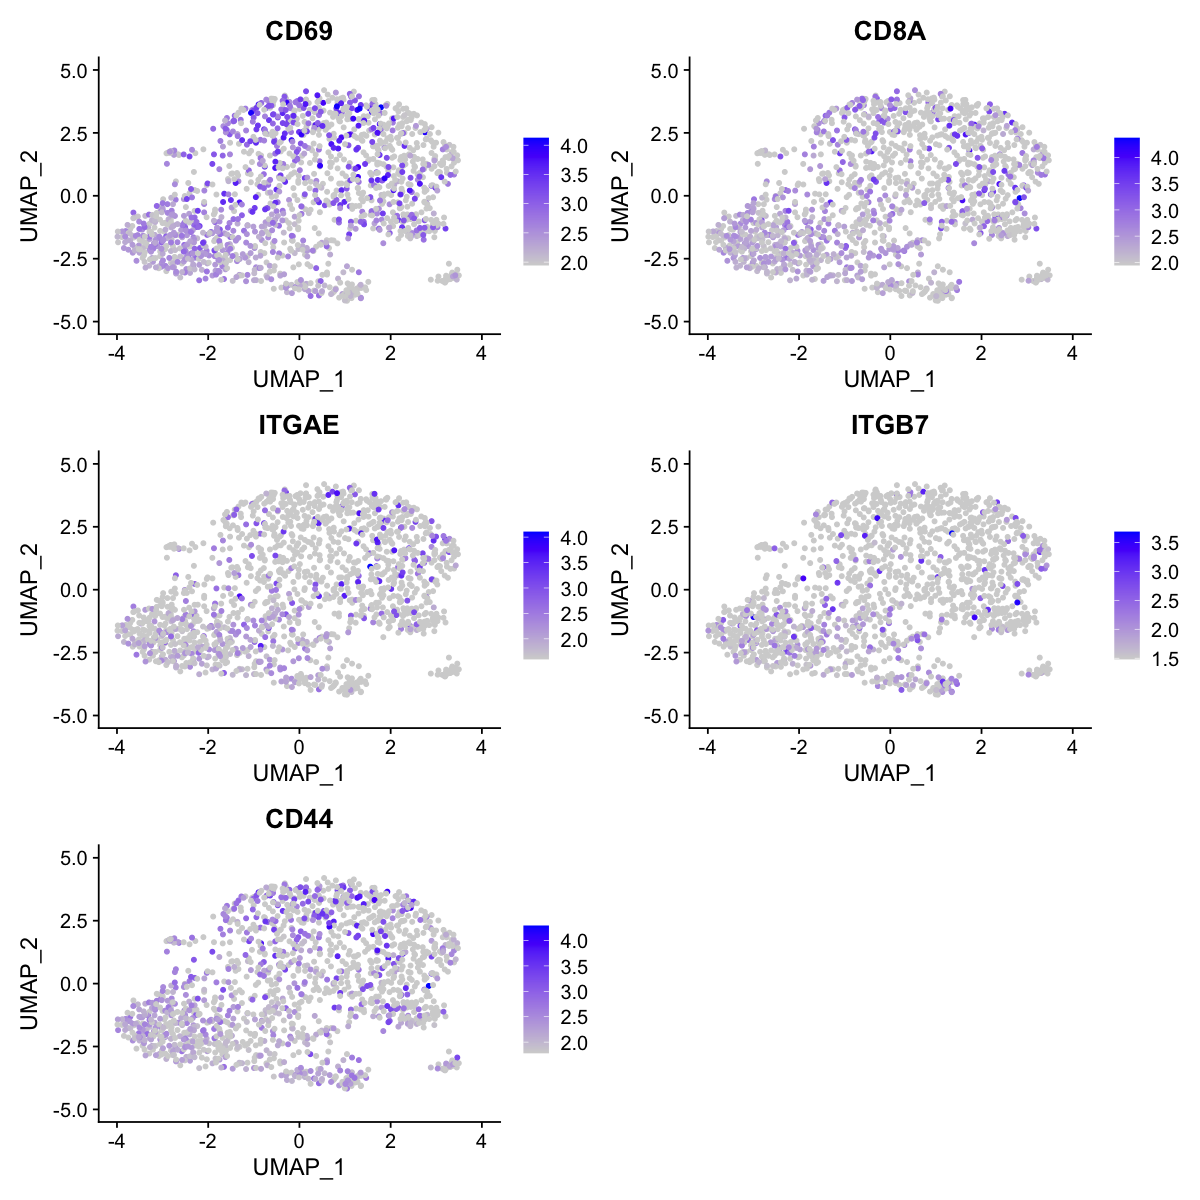

In [21]:
# T-Cell Markers
options(repr.plot.width=10, repr.plot.height=10) 
FeaturePlot(immune.combined, features = c("CD69", "CD8A", "ITGAE", "ITGB7", "CD44"), min.cutoff = "q9")

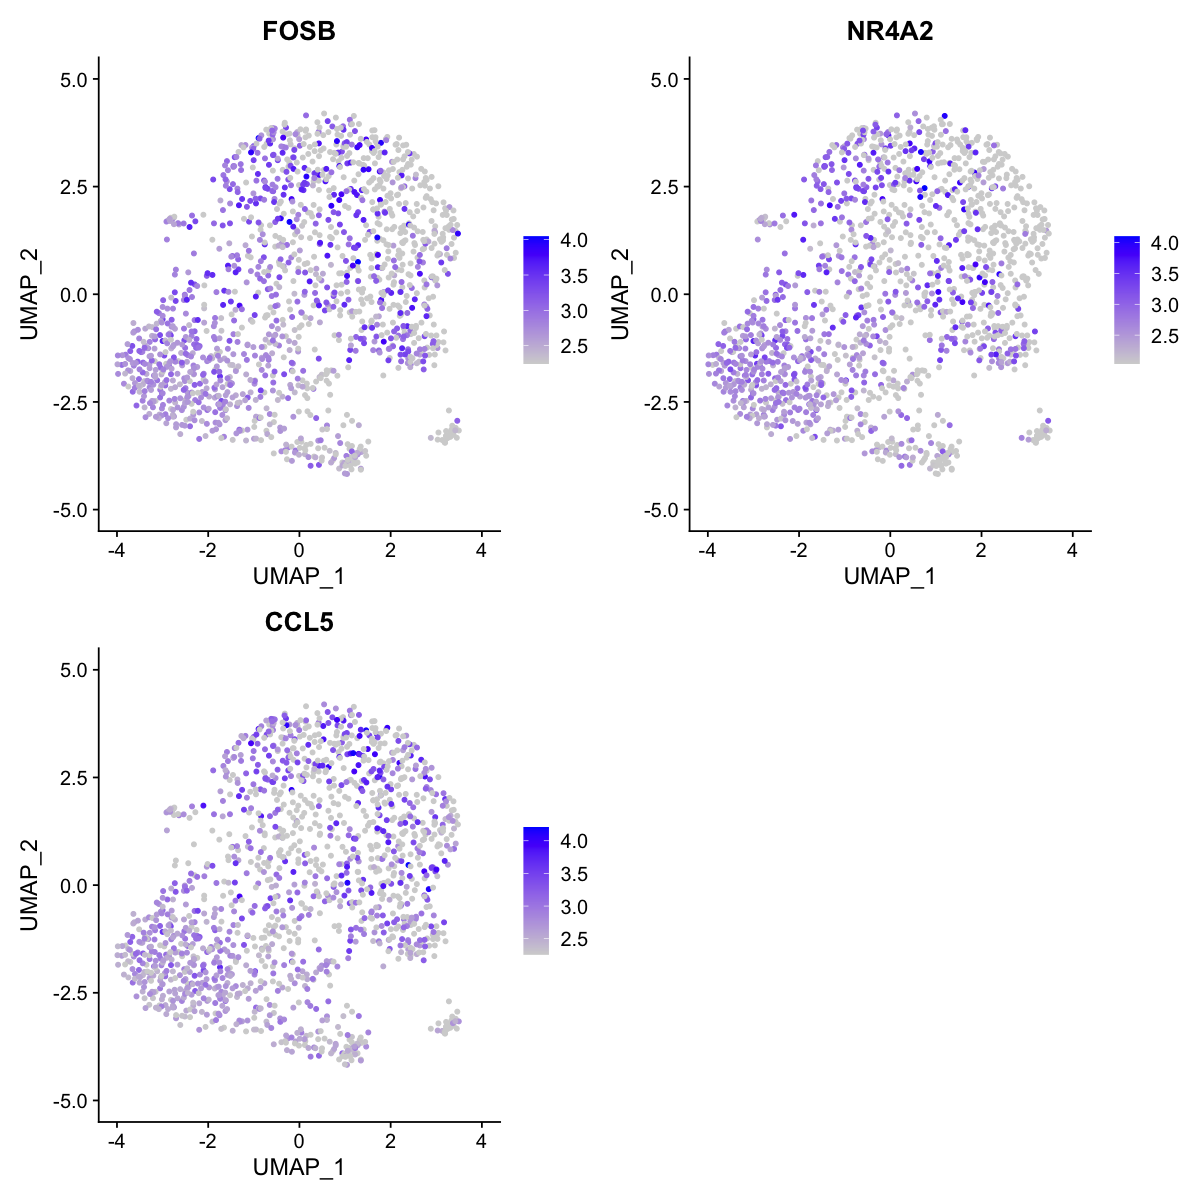

In [22]:
# Two specialized subtypes of CD8 T cells are annotated from this dataset: 
# one defined by exceptionally high expression of early response genes (FOSB, NR4A2, and CCL5)
options(repr.plot.width=10, repr.plot.height=10) 

FeaturePlot(immune.combined, features = c("FOSB", "NR4A2", "CCL5"), min.cutoff = "q9")

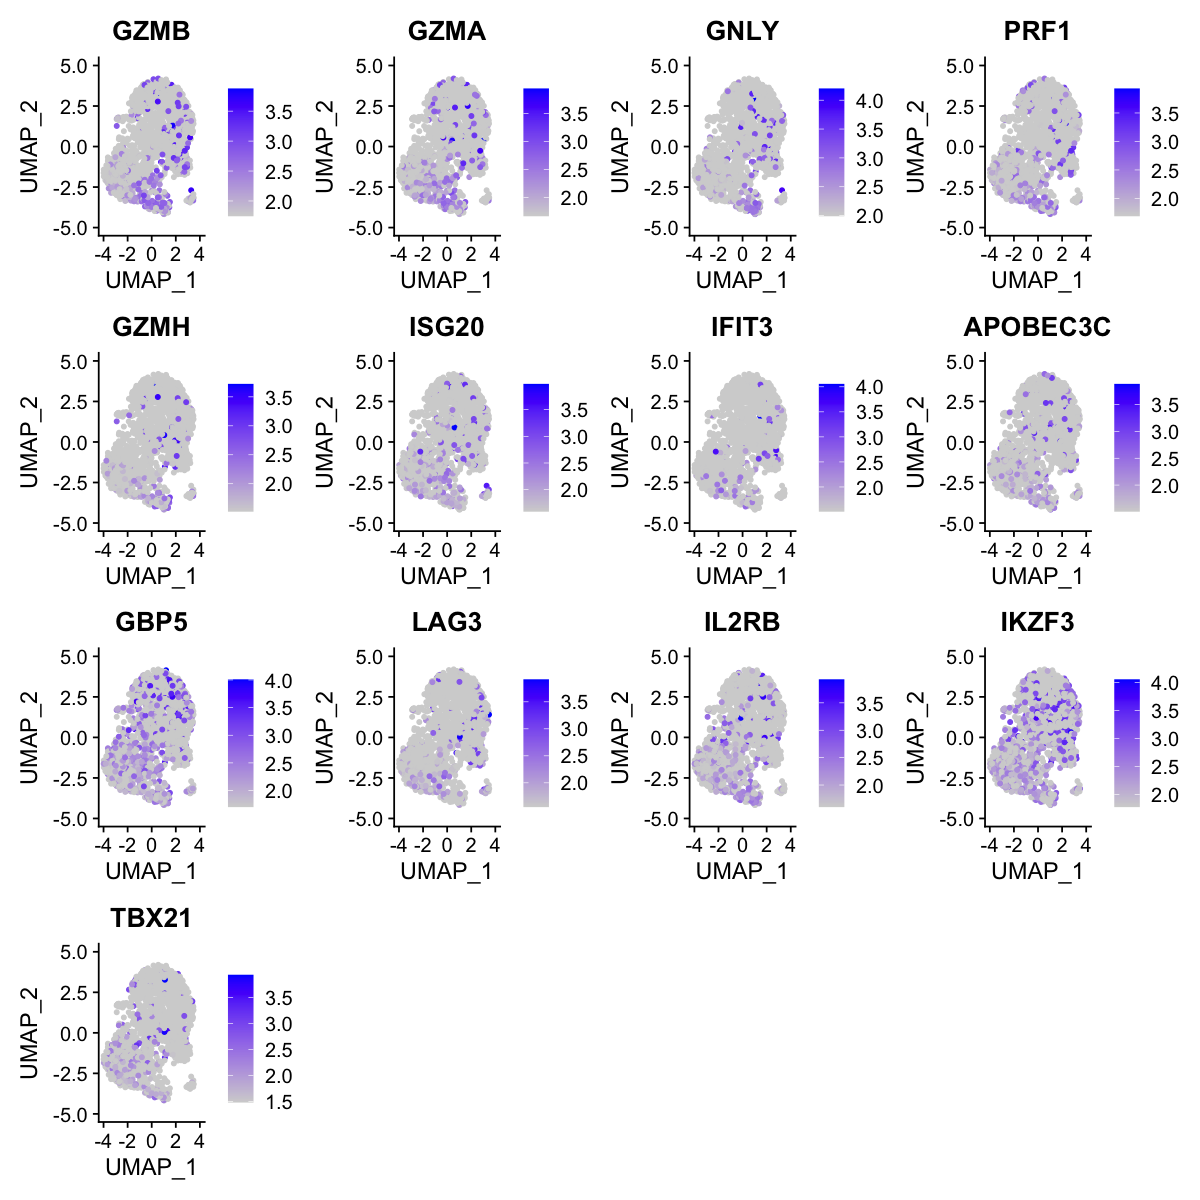

In [23]:
# and the other termed “interferon responsive cytotoxic CD8 T cells,” defined by granzyme and perforin expression 
# (GZMB, GZMA, GNLY, PRF1, GZMH), anti-viral genes (ISG20, IFIT3, APOBEC3C, GBP5) 
# and genes associated with effector CD8 T cell function (LAG3, IL2RB, IKZF3, TBX21). 

FeaturePlot(immune.combined, features = c("GZMB", "GZMA", "GNLY", "PRF1", "GZMH", "ISG20", 
                                          "IFIT3", "APOBEC3C", "GBP5",
                                         "LAG3", "IL2RB", "IKZF3", "TBX21"), min.cutoff = "q9")

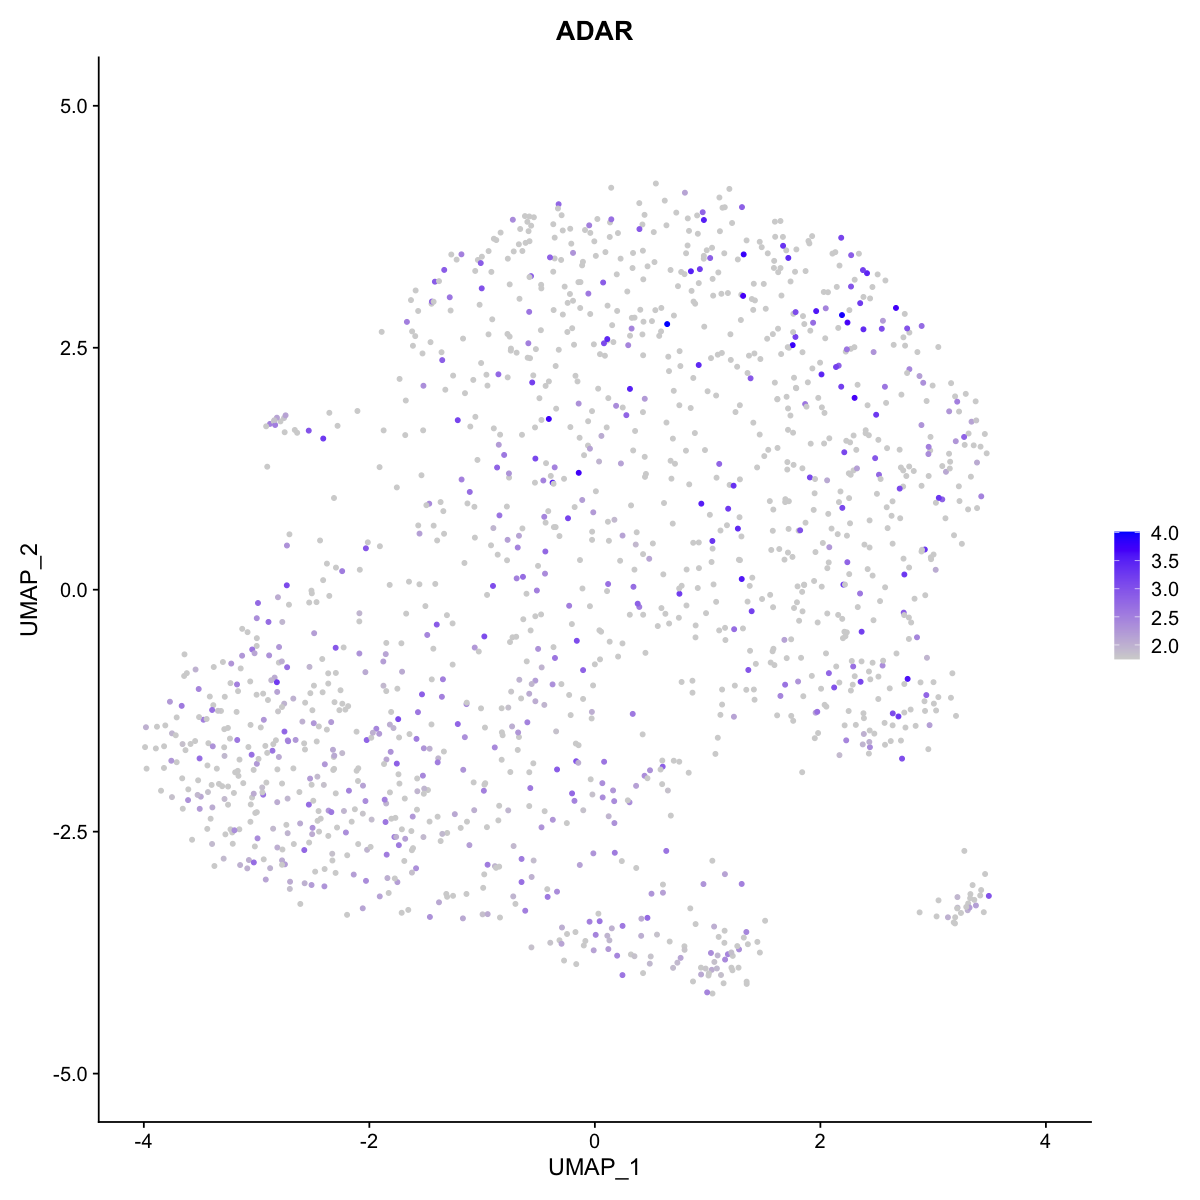

In [24]:
FeaturePlot(immune.combined, features = c("ADAR"), min.cutoff = "q9")

## Identify differential expressed genes across conditions

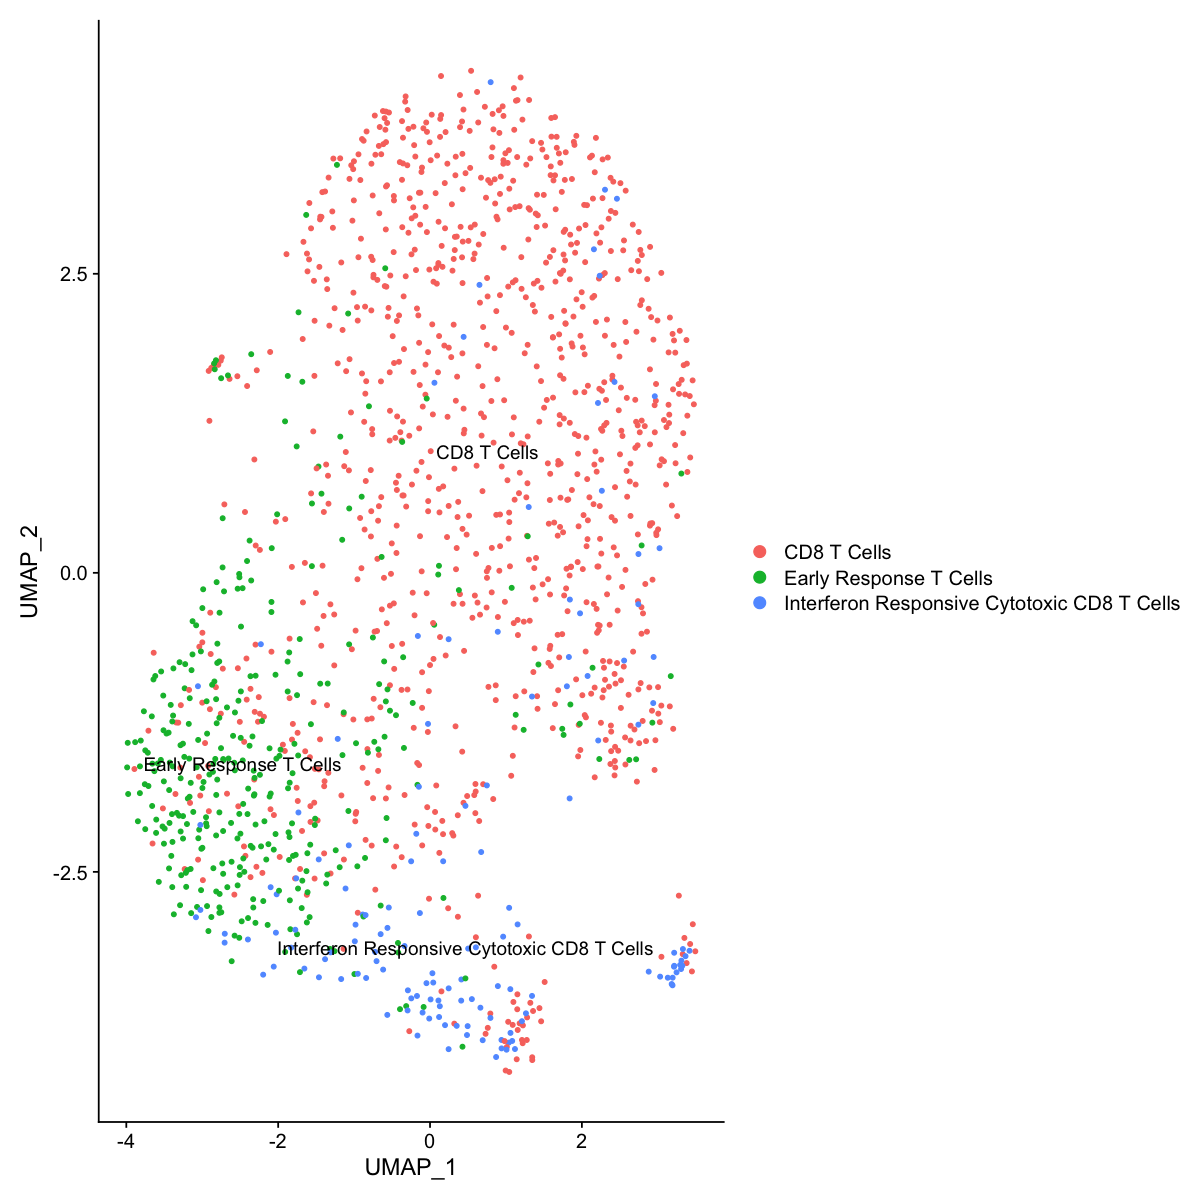

In [25]:
# To further understand which cluster should be identified as what subtype, the samples are colored by clusters 
# determined by SCP1289 
SCP1289.immune.combined <-immune.combined
Idents(SCP1289.immune.combined) <- immune.combined[[]]$Detailed_Cell_Annotations
DimPlot(SCP1289.immune.combined, label = TRUE)

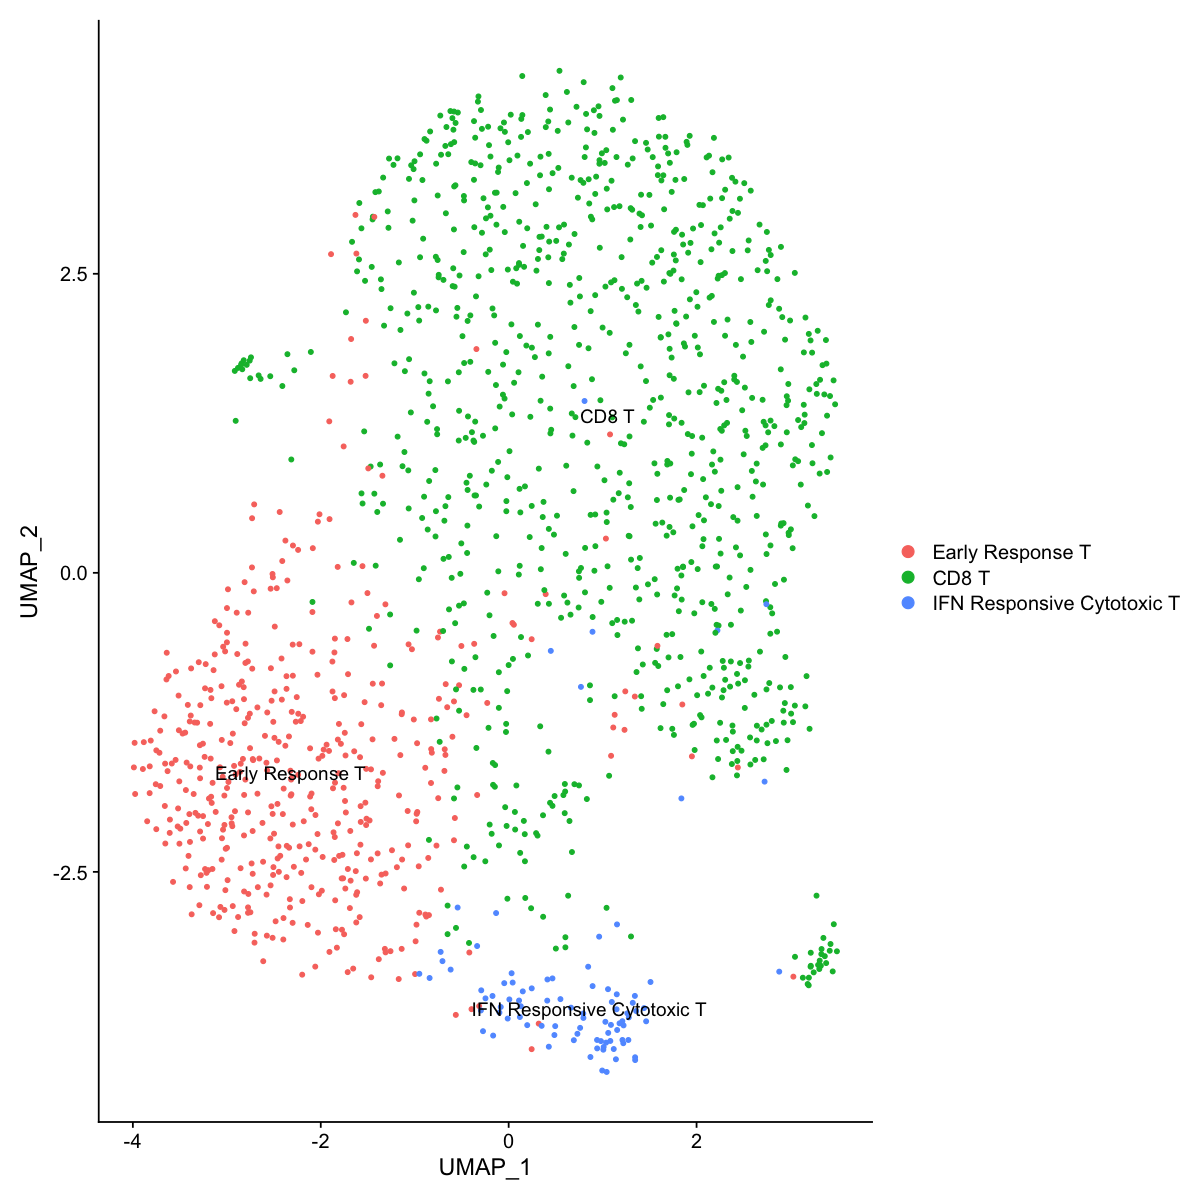

In [26]:
# Identification of clusters is performed 
ident.immune.combined <- RenameIdents(immune.combined, `0` = "Early Response T", `1` = "CD8 T", `2` = "CD8 T",
                                     `3` = "CD8 T", `4` ="IFN Responsive Cytotoxic T")
DimPlot(ident.immune.combined, label = TRUE)

In [27]:
# pdf("10062022_TCell_ReCluster.pdf",  width = 9, height = 6)
# DimPlot(ident.immune.combined, cols = c("#efbcdb", "#9b9fe1", "#87cbdd"), label = TRUE)
# dev.off()

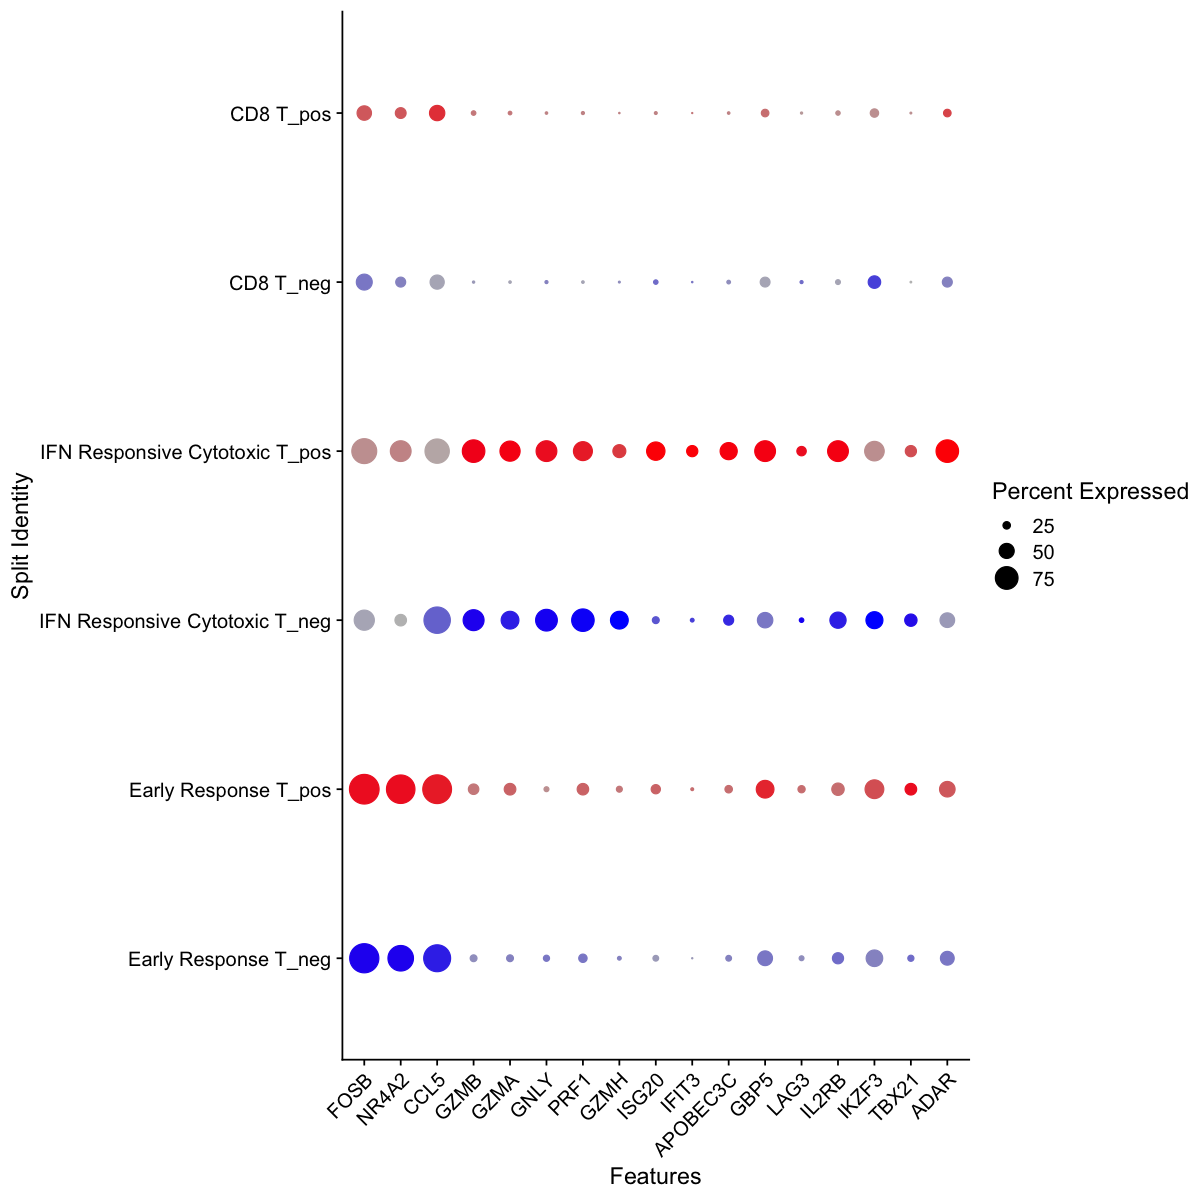

In [28]:
# Expression of T-Cell subtype markers and ADAR are plotted
Idents(ident.immune.combined) <- factor(Idents(ident.immune.combined), levels = c("Early Response T", "IFN Responsive Cytotoxic T", "CD8 T"))
markers.to.plot <- c("FOSB", "NR4A2", "CCL5", "GZMB", "GZMA", "GNLY", "PRF1", "GZMH", "ISG20", 
            "IFIT3", "APOBEC3C", "GBP5", "LAG3", "IL2RB", "IKZF3", "TBX21", "ADAR")
DotPlot(ident.immune.combined, features = markers.to.plot, cols = c("blue", "red"), dot.scale = 8, split.by = "SARSCoV2_PCR_Status") +
    RotatedAxis()

## Identify differential expressed genes across conditions



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


When using repel, set xnudge and ynudge to 0 for optimal results

When using repel, set xnudge and ynudge to 0 for optimal results

When using repel, set xnudge and ynudge to 0 for optimal results



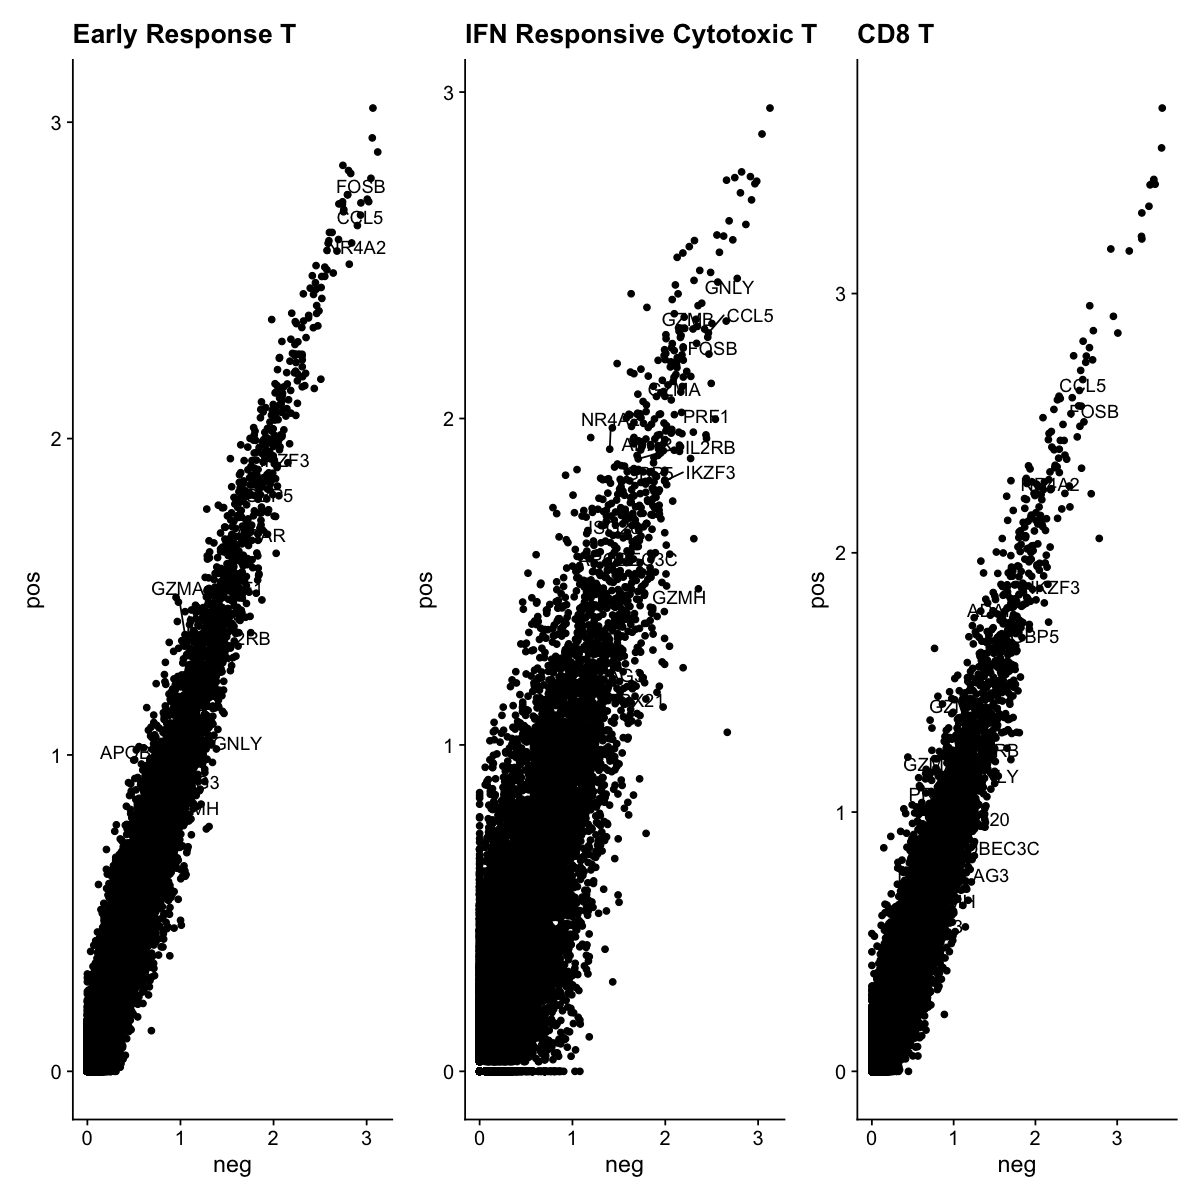

In [29]:
library(ggplot2)
library(cowplot)
theme_set(theme_cowplot())
t.cells <- subset(ident.immune.combined, idents = "Early Response T")
Idents(t.cells) <- "SARSCoV2_PCR_Status"
avg.t.cells <- as.data.frame(log1p(AverageExpression(t.cells, verbose = FALSE)$RNA))
avg.t.cells$gene <- rownames(avg.t.cells)

ifn.t.cells <- subset(ident.immune.combined, idents = "IFN Responsive Cytotoxic T")
Idents(ifn.t.cells) <- "SARSCoV2_PCR_Status"
avg.ifn.t.cells <- as.data.frame(log1p(AverageExpression(ifn.t.cells, verbose = FALSE)$RNA))
avg.ifn.t.cells$gene <- rownames(ifn.t.cells)

cd8.t.cells <- subset(ident.immune.combined, idents = "CD8 T")
Idents(cd8.t.cells) <- "SARSCoV2_PCR_Status"
avg.cd8.t.cells <- as.data.frame(log1p(AverageExpression(cd8.t.cells, verbose = FALSE)$RNA))
avg.cd8.t.cells$gene <- rownames(cd8.t.cells)

genes.to.label = c("FOSB", "NR4A2", "CCL5", "GZMB", "GZMA", "GNLY", "PRF1", "GZMH", "ISG20", 
            "IFIT3", "APOBEC3C", "GBP5", "LAG3", "IL2RB", "IKZF3", "TBX21", "ADAR")
p1 <- ggplot(avg.t.cells, aes(neg, pos)) + geom_point() + ggtitle("Early Response T")
p1 <- LabelPoints(plot = p1, points = genes.to.label, repel = TRUE)
p2 <- ggplot(avg.ifn.t.cells, aes(neg, pos)) + geom_point() + ggtitle("IFN Responsive Cytotoxic T")
p2 <- LabelPoints(plot = p2, points = genes.to.label, repel = TRUE)
p3 <- ggplot(avg.cd8.t.cells, aes(neg, pos)) + geom_point() + ggtitle("CD8 T")
p3 <- LabelPoints(plot = p3, points = genes.to.label, repel = TRUE)
p1 + p2 + p3

In [30]:
# Split the identifies by positive and negative for COVID
ident.immune.combined$celltype.posneg <- paste(Idents(ident.immune.combined), ident.immune.combined$SARSCoV2_PCR_Status, sep = "_")
ident.immune.combined$celltype <- Idents(ident.immune.combined)
Idents(ident.immune.combined) <- "celltype.posneg"

## Statistics on DE genes across conditions


In [31]:
# Early Response Pos v Neg

early.t <- FindMarkers(ident.immune.combined, ident.1 = "Early Response T_pos", ident.2 = "Early Response T_neg",
                       verbose = FALSE, logfc.threshold = 0)
head(early.t, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MT-ND2  2.523976e-09 -0.3945734 0.954 0.977 8.296562e-05
MT-ATP6 7.039914e-09 -0.3609317 0.938 0.982 2.314090e-04
MT-CO1  7.894632e-09 -0.3222779 0.975 0.991 2.595045e-04
ATF3    7.943835e-09  0.5713886 0.779 0.578 2.611218e-04
MYLIP   6.594218e-08  0.5773449 0.675 0.408 2.167585e-03
SERTAD1 2.072221e-07  0.7136400 0.596 0.385 6.811598e-03
MT-ND4  4.148028e-07 -0.3076553 0.979 0.986 1.363498e-02
XAF1    7.479344e-07  0.7869733 0.400 0.193 2.458535e-02
RAB30   1.660082e-06  0.7162787 0.171 0.032 5.456855e-02
ISG15   2.555994e-06  0.7286810 0.438 0.229 8.401809e-02
MT-CO2  2.603872e-06 -0.3279296 0.887 0.959 8.559189e-02
TXNDC17 2.995816e-06  0.6751405 0.208 0.055 9.847547e-02
SNHG12  3.070715e-06  0.5521278 0.600 0.390 1.009375e-01
MT-CYB  4.749693e-06 -0.3288210 0.946 0.963 1.561271e-01
MT-CO3  4.844360e-06 -0.3783785 0.854 0.927 1.592390e-01

In [32]:
# CD8 Pos v Neg

cd8.t <- FindMarkers(ident.immune.combined, ident.1 = "CD8 T_pos", ident.2 = "CD8 T_neg", verbose = FALSE,
                    logfc.threshold = 0)
head(cd8.t, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MTRNR2L1  2.371936e-22 -1.0460294 0.274 0.613 7.796791e-18
MTRNR2L12 3.509654e-15 -0.6557965 0.344 0.674 1.153658e-10
JAML      9.409293e-11 -0.7173165 0.151 0.348 3.092929e-06
B2M       1.474945e-10  0.3604396 0.833 0.845 4.848293e-06
CCDC88C   2.162391e-10 -0.5861133 0.162 0.361 7.107996e-06
TMC6      7.817879e-10 -0.7184367 0.162 0.345 2.569815e-05
XIST      2.745579e-09 -0.6183408 0.217 0.426 9.024993e-05
ZZEF1     3.232630e-09 -0.6373583 0.107 0.261 1.062598e-04
SPOCK2    9.033190e-09 -0.6697788 0.186 0.365 2.969300e-04
TMC8      1.026355e-08 -0.5646745 0.131 0.297 3.373732e-04
ARHGEF1   1.223016e-08 -0.5877943 0.164 0.335 4.020177e-04
ITGB2     1.922862e-08 -0.5497022 0.057 0.174 6.320641e-04
RBM5      3.476080e-08 -0.5024957 0.180 0.361 1.142622e-03
SUGP2     7.204884e-08 -0.7013001 0.083 0.210 2.368317e-03
LPIN1     8.798469e-08 -0.5895188 0.109 0.248 2.892145e-03

In [33]:
# IFN Pos v Neg

ifn.t <- FindMarkers(ident.immune.combined, ident.1 = "IFN Responsive Cytotoxic T_pos", ident.2 = "IFN Responsive Cytotoxic T_neg", 
                     verbose = FALSE, logfc.threshold = 0)
head(ifn.t, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MTRNR2L1 3.288038e-10 -2.3507624 0.255 0.821 1.080811e-05
ITGB2    2.477986e-06 -1.3787405 0.451 0.769 8.145388e-02
SYNE1    2.611257e-06 -1.2677975 0.412 0.795 8.583463e-02
TYMP     7.421014e-06  1.2063805 0.569 0.077 2.439361e-01
EIF4A3   1.235397e-05  1.4053226 0.549 0.077 4.060873e-01
NOP56    1.244798e-05  1.2989370 0.706 0.231 4.091774e-01
MYBL1    1.259246e-05 -1.5354991 0.176 0.590 4.139268e-01
HSPH1    1.425794e-05  1.0819643 0.863 0.385 4.686728e-01
AHNAK    2.148730e-05 -0.7820866 0.686 0.846 7.063092e-01
DUSP10   3.650648e-05  0.8721863 0.490 0.051 1.000000e+00
PNP      3.924217e-05  1.4504003 0.569 0.128 1.000000e+00
COTL1    4.541665e-05  1.3518277 0.627 0.179 1.000000e+00
TXNIP    4.556240e-05 -0.7049672 0.725 0.846 1.000000e+00
GOLGB1   6.002524e-05  1.1458785 0.706 0.231 1.000000e+00
LY6E     6.171004e-05  1.4050581 0.529 0.103 1.000000e+00

In [34]:
ifn.t["ADAR",]
cd8.t["ADAR",]
early.t["ADAR",]

p_val      avg_log2FC pct.1 pct.2 p_val_adj
ADAR 0.02690276 0.5420409  0.745 0.487 1

p_val     avg_log2FC pct.1 pct.2 p_val_adj
ADAR 0.1663386 0.1874618  0.253 0.332 1

p_val     avg_log2FC pct.1 pct.2 p_val_adj
ADAR 0.2868917 0.1254152  0.517 0.459 1

In [35]:
# write.table(ifn.t, "20220804_IFNResponsiveCytotoxicTCell_DE", append = FALSE, sep = "\t", row.names = TRUE, col.names = TRUE)
# write.table(cd8.t, "20220804_CD8TCell_DE", append = FALSE, sep = "\t", row.names = TRUE, col.names = TRUE)
# write.table(ifn.t, "20220804_EarlyResponseTCell_DE", append = FALSE, sep = "\t", row.names = TRUE, col.names = TRUE)

## Statistics on DE genes by group 

In [36]:
early.t.pos <- FindMarkers(ident.immune.combined, ident.1 = "Early Response T_pos", verbose = FALSE)
head(early.t.pos, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
ATF3     1.236697e-43  1.0779342 0.779 0.283 4.065145e-39
FAM53C   1.995875e-37  0.9486220 0.629 0.201 6.560641e-33
SERTAD1  8.482156e-35  0.9336165 0.596 0.202 2.788170e-30
MALAT1   2.524582e-34 -0.7189409 1.000 0.988 8.298554e-30
RASGEF1B 1.295033e-33  0.8114019 0.721 0.266 4.256904e-29
DEDD2    2.887158e-32  0.7795927 0.679 0.251 9.490377e-28
ODC1     2.766293e-31  0.8459079 0.650 0.240 9.093080e-27
MYLIP    3.893084e-29  0.7300241 0.675 0.254 1.279696e-24
MT-ND4   9.098901e-29 -0.7923756 0.979 0.950 2.990900e-24
ZFP36    9.941570e-29  0.7124562 0.733 0.306 3.267894e-24
CSRNP1   1.221296e-28  0.8430946 0.562 0.195 4.014521e-24
TIPARP   4.752318e-28  0.7617479 0.667 0.265 1.562134e-23
EHD1     6.252860e-28  0.7647253 0.646 0.255 2.055378e-23
MT-ATP6  1.206922e-27 -0.8456347 0.938 0.914 3.967274e-23
CBX4     1.486348e-27  0.7172819 0.567 0.206 4.885775e-23

In [37]:
early.t.neg <- FindMarkers(ident.immune.combined, ident.1 = "Early Response T_neg", verbose = FALSE)
head(early.t.neg, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MALAT1    1.970788e-28 -0.6725773 0.995 0.989 6.478176e-24
NR4A3     5.818630e-26  0.9482060 0.573 0.220 1.912642e-21
DUSP2     1.958755e-22  0.8239851 0.601 0.252 6.438625e-18
CRTAM     2.537556e-20  0.9761657 0.294 0.080 8.341199e-16
RGCC      6.183617e-19  0.6484633 0.647 0.304 2.032617e-14
JUND      9.802031e-19  0.5625979 0.803 0.437 3.222026e-14
YPEL5     1.711781e-18  0.5504813 0.693 0.335 5.626796e-14
BTG2      3.535609e-17  0.5016052 0.711 0.354 1.162190e-12
UBALD2    7.380905e-17  0.7295094 0.422 0.169 2.426177e-12
GABARAPL1 1.198097e-16  0.7759716 0.408 0.164 3.938265e-12
JMY       3.529362e-16  0.6272434 0.454 0.186 1.160136e-11
NR4A2     3.667069e-16  0.5402926 0.844 0.478 1.205402e-11
DUSP4     6.519112e-16  0.8222645 0.404 0.164 2.142897e-11
NR4A1     9.796653e-16  0.4870157 0.702 0.356 3.220258e-11
NEU1      2.093808e-15  0.5041495 0.647 0.325 6.882556e-11

In [38]:
cd8.t.pos <- FindMarkers(ident.immune.combined, ident.1 = "CD8 T_pos", verbose = FALSE)
head(cd8.t.pos, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MALAT1   1.608708e-64  0.6543512 0.984 0.994 5.287984e-60
B2M      9.106194e-30  0.4475341 0.833 0.930 2.993297e-25
EHD1     7.730929e-26 -0.5402639 0.149 0.441 2.541234e-21
DEDD2    9.980170e-26 -0.6015645 0.152 0.442 3.280582e-21
METRNL   2.130681e-25 -0.7576743 0.058 0.284 7.003760e-21
FAM53C   6.705096e-24 -0.6804599 0.122 0.378 2.204032e-19
NACA     7.016415e-24 -0.4492360 0.224 0.551 2.306366e-19
CCDC88C  7.263920e-24 -0.5611311 0.162 0.445 2.387723e-19
C6orf48  1.254111e-23 -0.5414671 0.112 0.365 4.122389e-19
SUN2     1.962887e-23 -0.5295261 0.190 0.488 6.452207e-19
AHSA1    2.986085e-23 -0.5768920 0.107 0.353 9.815561e-19
SLC9A3R1 3.264435e-23 -0.5777698 0.120 0.373 1.073052e-18
ITGAL    4.964295e-23 -0.4139049 0.177 0.470 1.631813e-18
NR4A1    6.901177e-22 -0.3454412 0.220 0.542 2.268486e-17
UBALD2   1.145754e-21 -0.6189365 0.081 0.297 3.766208e-17

In [39]:
cd8.t.neg <- FindMarkers(ident.immune.combined, ident.1 = "CD8 T_neg", verbose = FALSE)
head(cd8.t.neg, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MTRNR2L1  2.592797e-24  1.1586691 0.613 0.351 8.522784e-20
MTRNR2L12 1.035543e-19  0.8557689 0.674 0.442 3.403933e-15
ATF3      3.849190e-17 -1.0433309 0.148 0.421 1.265267e-12
MT-CO3    8.191823e-15  0.4431934 0.919 0.802 2.692734e-10
MT-ND2    3.623143e-13  0.3770361 0.958 0.895 1.190963e-08
MT-ND1    3.975598e-13  0.4120140 0.916 0.815 1.306819e-08
NR4A2     9.854104e-13 -0.6946468 0.332 0.585 3.239142e-08
MT-CYB    1.359452e-12  0.3854241 0.932 0.874 4.468655e-08
MT-ATP6   6.103944e-12  0.3374152 0.965 0.906 2.006428e-07
CXCR4     2.663483e-11 -0.7372248 0.290 0.512 8.755135e-07
MT-CO1    3.474781e-11  0.3185439 0.974 0.920 1.142195e-06
ISG15     4.485281e-11 -0.9502543 0.071 0.245 1.474357e-06
MT-ND5    5.396039e-11  0.3130082 0.958 0.886 1.773732e-06
ZFP36     5.635230e-11 -0.8028481 0.210 0.420 1.852356e-06
UBB       6.542410e-11 -0.5821425 0.497 0.706 2.150555e-06

In [40]:
ifn.t.pos <- FindMarkers(ident.immune.combined, ident.1 = "IFN Responsive Cytotoxic T_pos", ident.2 = "IFN Responsive Cytotoxic T_neg", verbose = FALSE)
head(ifn.t.pos, n = 15)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
MTRNR2L1 3.288038e-10 -2.3507624 0.255 0.821 1.080811e-05
ITGB2    2.477986e-06 -1.3787405 0.451 0.769 8.145388e-02
SYNE1    2.611257e-06 -1.2677975 0.412 0.795 8.583463e-02
TYMP     7.421014e-06  1.2063805 0.569 0.077 2.439361e-01
EIF4A3   1.235397e-05  1.4053226 0.549 0.077 4.060873e-01
NOP56    1.244798e-05  1.2989370 0.706 0.231 4.091774e-01
MYBL1    1.259246e-05 -1.5354991 0.176 0.590 4.139268e-01
HSPH1    1.425794e-05  1.0819643 0.863 0.385 4.686728e-01
AHNAK    2.148730e-05 -0.7820866 0.686 0.846 7.063092e-01
DUSP10   3.650648e-05  0.8721863 0.490 0.051 1.000000e+00
PNP      3.924217e-05  1.4504003 0.569 0.128 1.000000e+00
COTL1    4.541665e-05  1.3518277 0.627 0.179 1.000000e+00
TXNIP    4.556240e-05 -0.7049672 0.725 0.846 1.000000e+00
GOLGB1   6.002524e-05  1.1458785 0.706 0.231 1.000000e+00
LY6E     6.171004e-05  1.4050581 0.529 0.103 1.000000e+00

In [41]:
ifn.t.neg <- FindMarkers(ident.immune.combined, ident.1 = "IFN Responsive Cytotoxic T_neg", verbose = FALSE)
head(ifn.t.neg, n = 15)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
FGFBP2  8.741343e-105 2.3669222  0.538 0.009 2.873367e-100
CX3CR1   2.552711e-86 2.2111768  0.436 0.007  8.391017e-82
FCGR3A   2.550115e-66 2.1737617  0.410 0.010  8.382484e-62
ITGAM    2.022671e-63 1.8047434  0.410 0.011  6.648722e-59
PLEK     2.082424e-55 2.3001832  0.615 0.040  6.845136e-51
LAIR2    1.016357e-48 1.2793535  0.282 0.006  3.340868e-44
CMKLR1   5.766814e-35 0.7280013  0.128 0.001  1.895609e-30
S1PR5    1.496759e-34 1.2055962  0.256 0.009  4.919996e-30
PDZD4    2.482565e-32 1.1302254  0.205 0.006  8.160440e-28
TYROBP   3.874282e-31 1.8039697  0.487 0.046  1.273515e-26
ITGB2    4.490518e-29 2.0035853  0.769 0.142  1.476078e-24
PLEKHG3  1.555709e-28 1.4944625  0.333 0.022  5.113773e-24
B4GALT6  3.682516e-27 0.6249217  0.103 0.001  1.210480e-22
ADGRG1   3.983890e-25 1.6010169  0.462 0.053  1.309544e-20
S1PR1    2.545527e-24 1.0326310  0.231 0.012  8.367403e-20

## ADAR Specific Plots Based on Integration

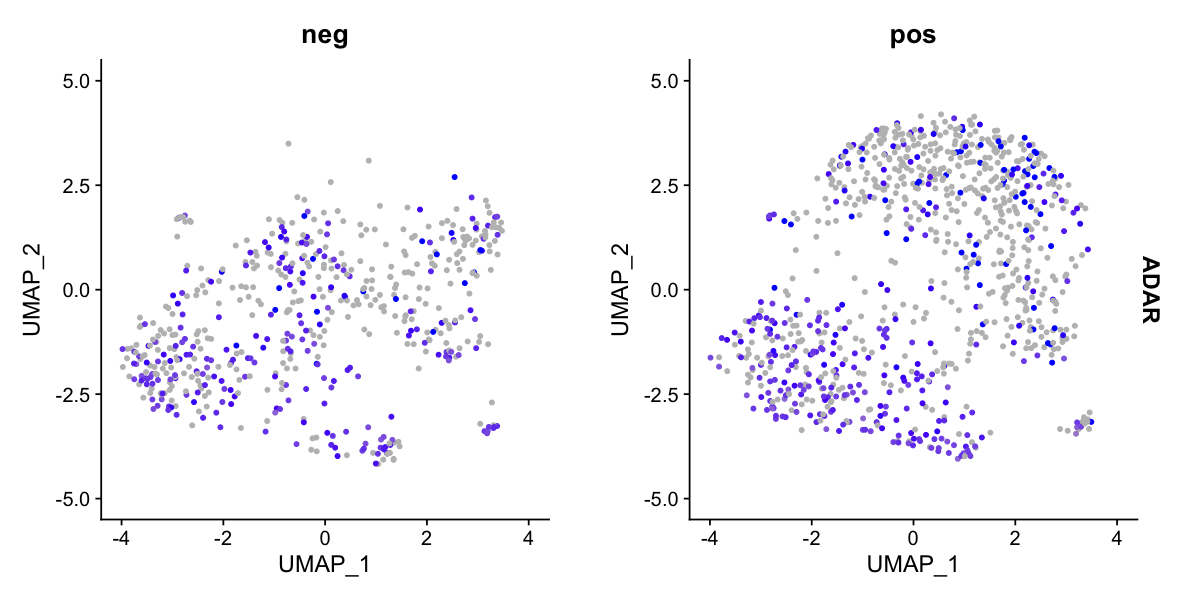

In [42]:
options(repr.plot.width=10, repr.plot.height=5) 
FeaturePlot(ident.immune.combined, features = c("ADAR"), split.by = "SARSCoV2_PCR_Status", max.cutoff = 3,
    cols = c("grey", "blue"))

In [43]:
ident.immune.combined$celltype <-factor(x = ident.immune.combined$celltype, levels = c('CD8 T', 'Early Response T',
                                                                                      'IFN Responsive Cytotoxic T'))

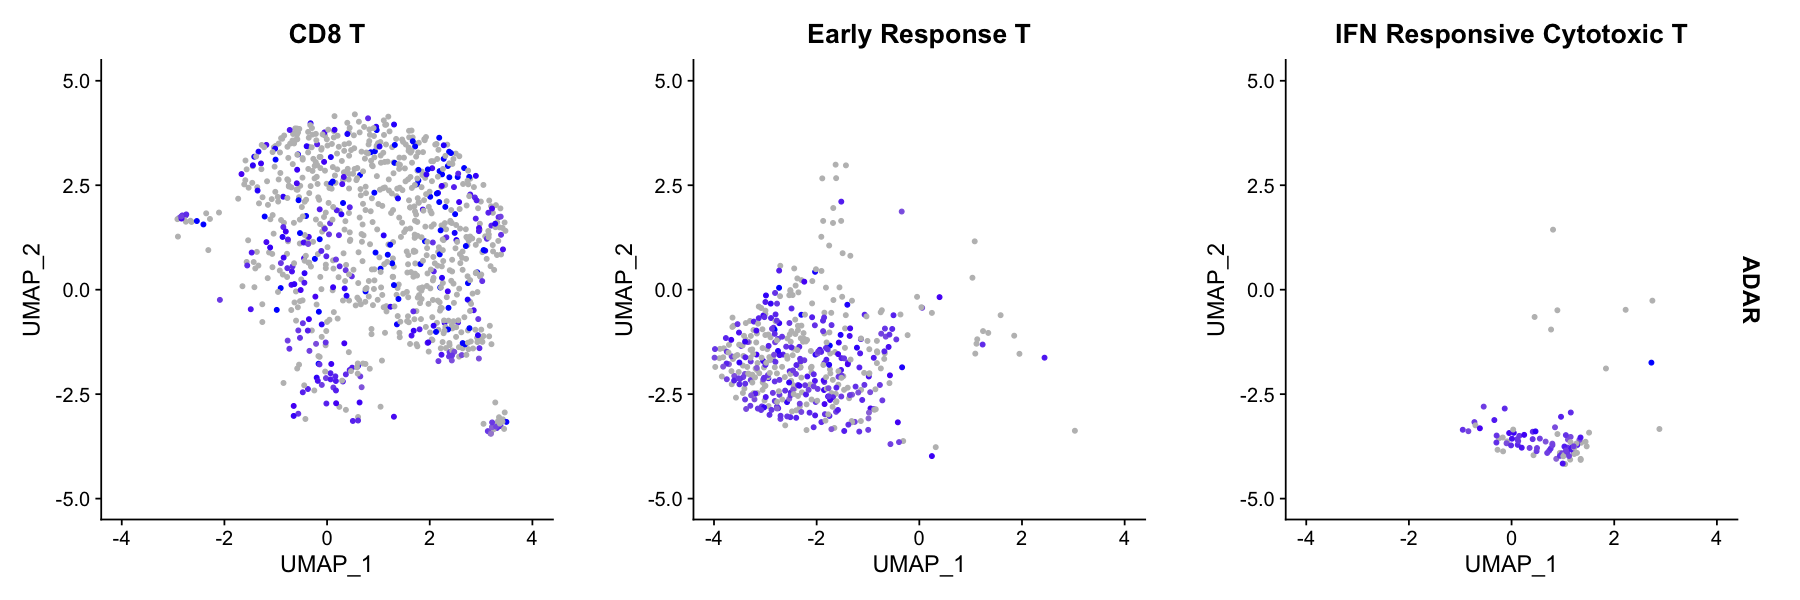

In [44]:
options(repr.plot.width=15, repr.plot.height=5) 
FeaturePlot(ident.immune.combined, features = c("ADAR"), split.by = "celltype", max.cutoff = 3,
    cols = c("grey", "blue"))

In [45]:
# pdf("12062022_ADARfeatureplot_celltype.pdf",  width = 15, height = 5)

# FeaturePlot(ident.immune.combined, features = c("ADAR"), split.by = "celltype", max.cutoff = 3,
#     cols = c("grey", "blue"))
# dev.off()

In [49]:
ident.immune.combined$SARSCoV2_PCR_Status <-factor(x = ident.immune.combined$SARSCoV2_PCR_Status, levels = c('pos', 'neg'))

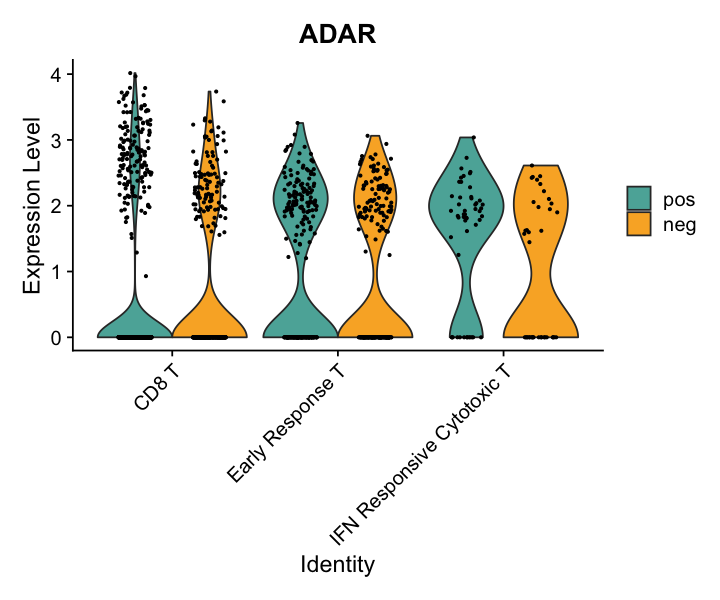

In [54]:
options(repr.plot.width=6, repr.plot.height=5) 

plots <- VlnPlot(ident.immune.combined, features = c("ADAR"), split.by = "SARSCoV2_PCR_Status", group.by = "celltype",
    pt.size = 0.5, combine = FALSE, cols = c('#5bb0a7', '#f9b12e' )) 
wrap_plots(plots = plots, ncol = 1)

In [55]:
# pdf("10172022_ADARExp_ReCluster.pdf",  width = 6, height = 5)

# plots <- VlnPlot(ident.immune.combined, features = c("ADAR"), split.by = "SARSCoV2_PCR_Status", group.by = "celltype",
#     pt.size = 0.5, combine = FALSE, cols = c('#5bb0a7', '#f9b12e' )) 
# wrap_plots(plots = plots, ncol = 1)
# dev.off()

pdf 
  2